### *Data Retrieval*

In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv("D:\Code\Python\TH_Machine_Learning\diabetes\diabetic_data.csv")

In [8]:
df_readmitted_lt30 = diabetes[diabetes['readmitted'] == '<30']
df_not_readmitted_lt30 = diabetes[diabetes['readmitted'] != '<30']

In [9]:
df_readmitted_lt30.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11357 entries, 11 to 101750
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              11357 non-null  int64 
 1   patient_nbr               11357 non-null  int64 
 2   race                      11357 non-null  object
 3   gender                    11357 non-null  object
 4   age                       11357 non-null  object
 5   weight                    11357 non-null  object
 6   admission_type_id         11357 non-null  int64 
 7   discharge_disposition_id  11357 non-null  int64 
 8   admission_source_id       11357 non-null  int64 
 9   time_in_hospital          11357 non-null  int64 
 10  payer_code                11357 non-null  object
 11  medical_specialty         11357 non-null  object
 12  num_lab_procedures        11357 non-null  int64 
 13  num_procedures            11357 non-null  int64 
 14  num_medications          

In [10]:
# drop duplicate based on patient_nbr
df_not_readmitted_lt30 = df_not_readmitted_lt30.drop_duplicates(subset='patient_nbr', keep='first')
df_result = pd.concat([df_readmitted_lt30, df_not_readmitted_lt30],axis=0)
diabetes = df_result.sample(frac = 1).drop_duplicates().reset_index()

In [11]:
diabetes = diabetes.drop('index',axis=1)

In [12]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80522 entries, 0 to 80521
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              80522 non-null  int64 
 1   patient_nbr               80522 non-null  int64 
 2   race                      80522 non-null  object
 3   gender                    80522 non-null  object
 4   age                       80522 non-null  object
 5   weight                    80522 non-null  object
 6   admission_type_id         80522 non-null  int64 
 7   discharge_disposition_id  80522 non-null  int64 
 8   admission_source_id       80522 non-null  int64 
 9   time_in_hospital          80522 non-null  int64 
 10  payer_code                80522 non-null  object
 11  medical_specialty         80522 non-null  object
 12  num_lab_procedures        80522 non-null  int64 
 13  num_procedures            80522 non-null  int64 
 14  num_medications       

In [13]:
# Number of unique values from each column
diabetes.nunique()

encounter_id                80522
patient_nbr                 71518
race                            6
gender                          3
age                            10
weight                         10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            17
time_in_hospital               14
payer_code                     18
medical_specialty              71
num_lab_procedures            116
num_procedures                  7
num_medications                75
number_outpatient              34
number_emergency               27
number_inpatient               21
diag_1                        705
diag_2                        739
diag_3                        768
number_diagnoses               16
max_glu_serum                   3
A1Cresult                       3
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  4
glimepiride                     4
acetohexamide 

# Data Understand

## Unique feature analysis

In [14]:
# unique values from each columns that has less than 5 unique values
cols_to_plot = pd.Series({col: diabetes[col].unique() for col in diabetes.columns if diabetes[col].nunique() <= 5})
cols_to_plot

gender                      [Female, Male, Unknown/Invalid]
max_glu_serum                       [nan, Norm, >200, >300]
A1Cresult                               [nan, >7, Norm, >8]
metformin                            [No, Steady, Up, Down]
repaglinide                          [No, Steady, Up, Down]
nateglinide                          [No, Steady, Up, Down]
chlorpropamide                       [No, Steady, Up, Down]
glimepiride                          [No, Down, Steady, Up]
acetohexamide                                  [No, Steady]
glipizide                            [No, Steady, Up, Down]
glyburide                            [No, Steady, Up, Down]
tolbutamide                                    [No, Steady]
pioglitazone                         [No, Steady, Down, Up]
rosiglitazone                        [No, Steady, Down, Up]
acarbose                             [No, Steady, Up, Down]
miglitol                             [No, Steady, Down, Up]
troglitazone                            

In [15]:
cols_to_plot.index

Index(['gender', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

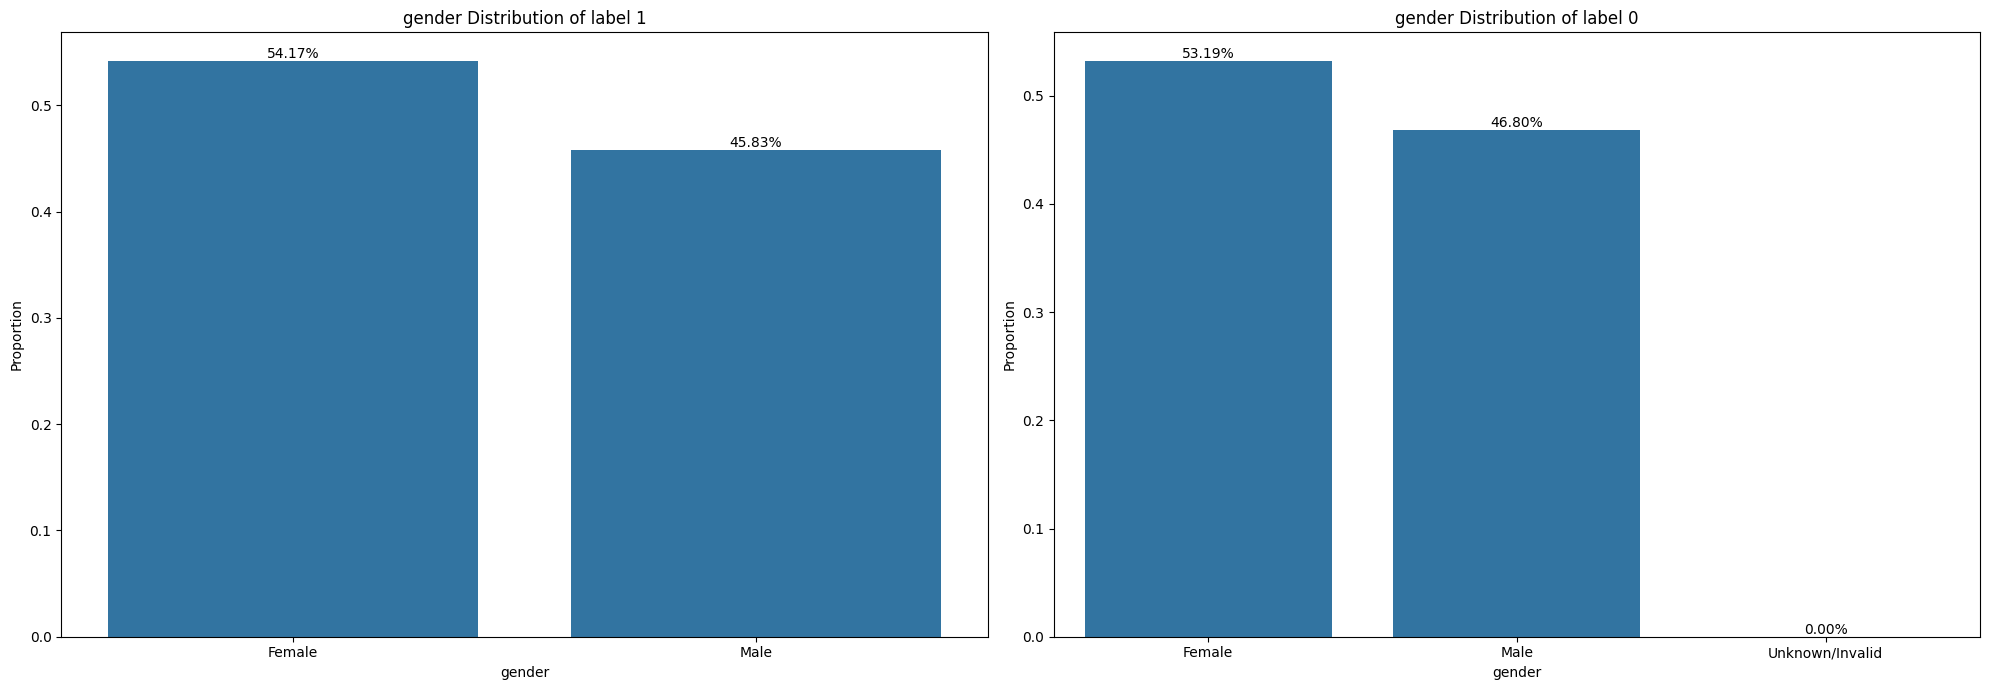

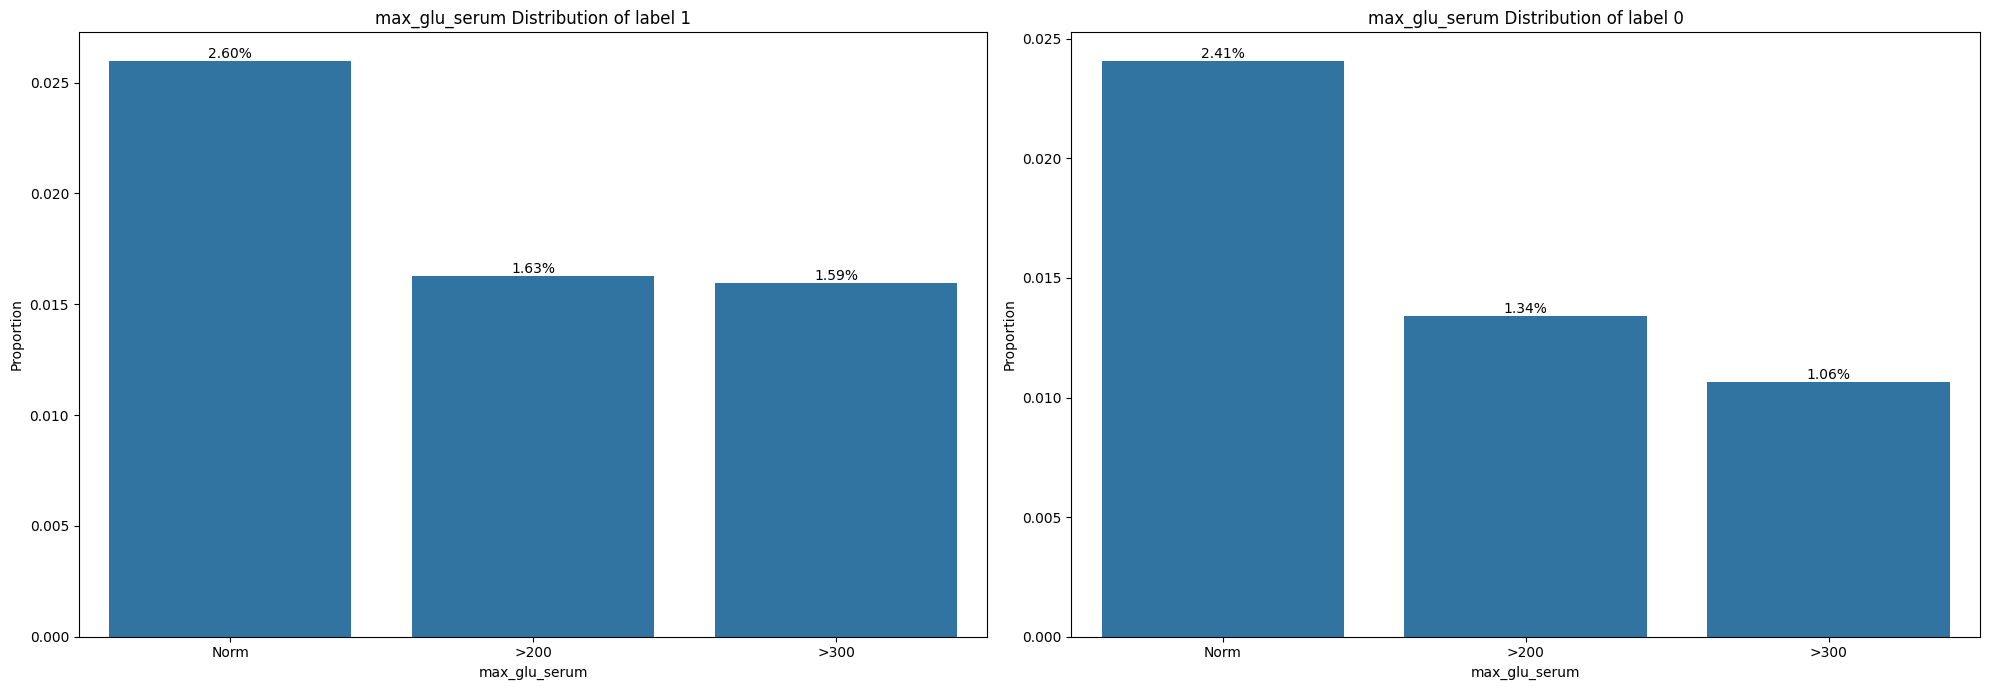

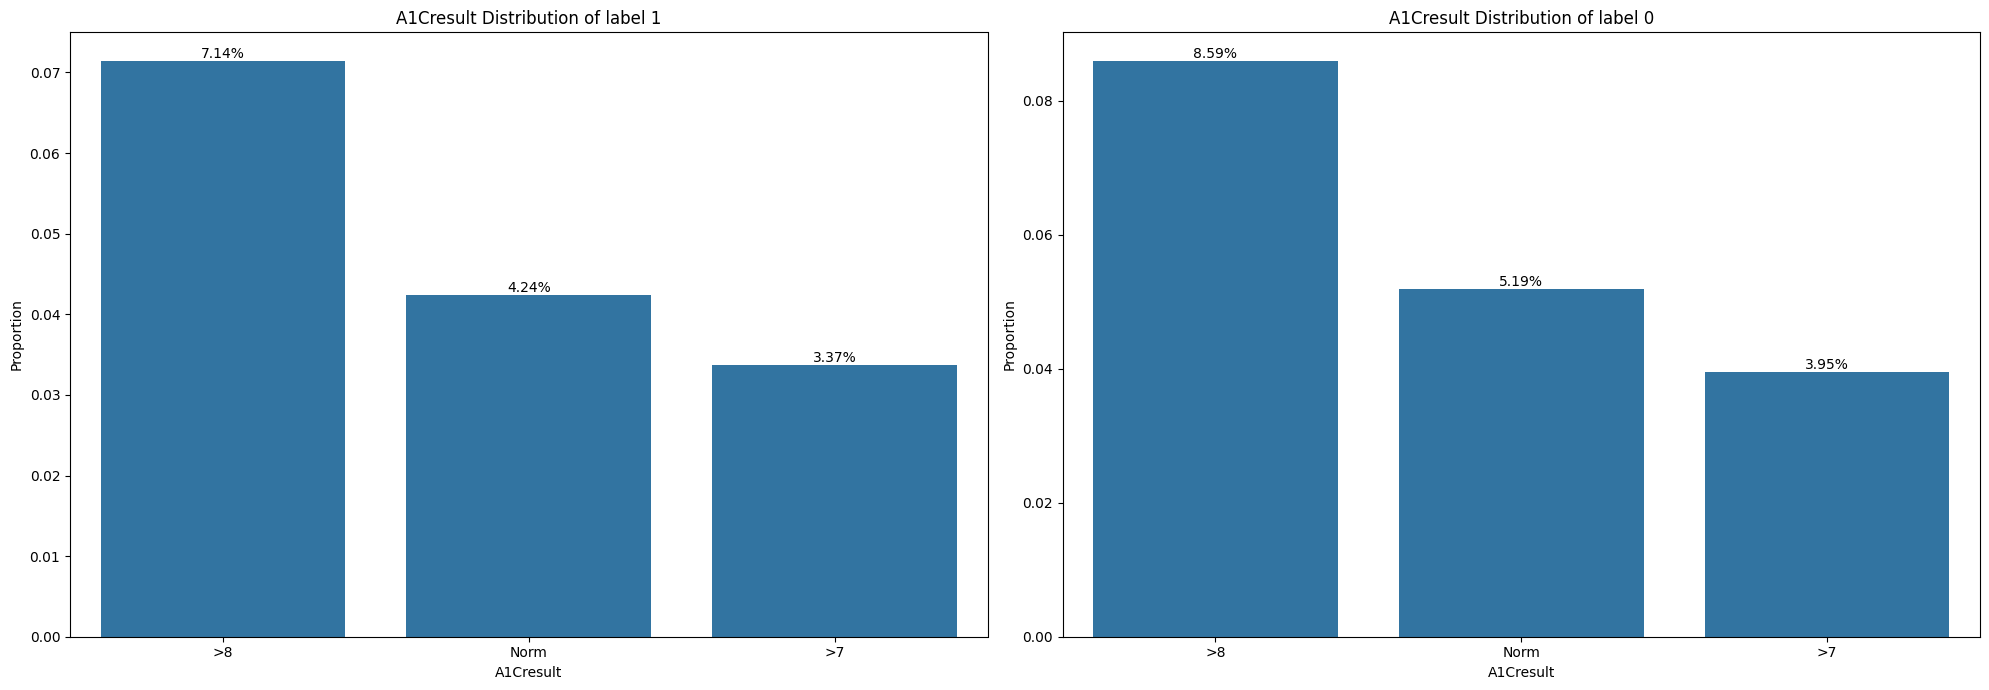

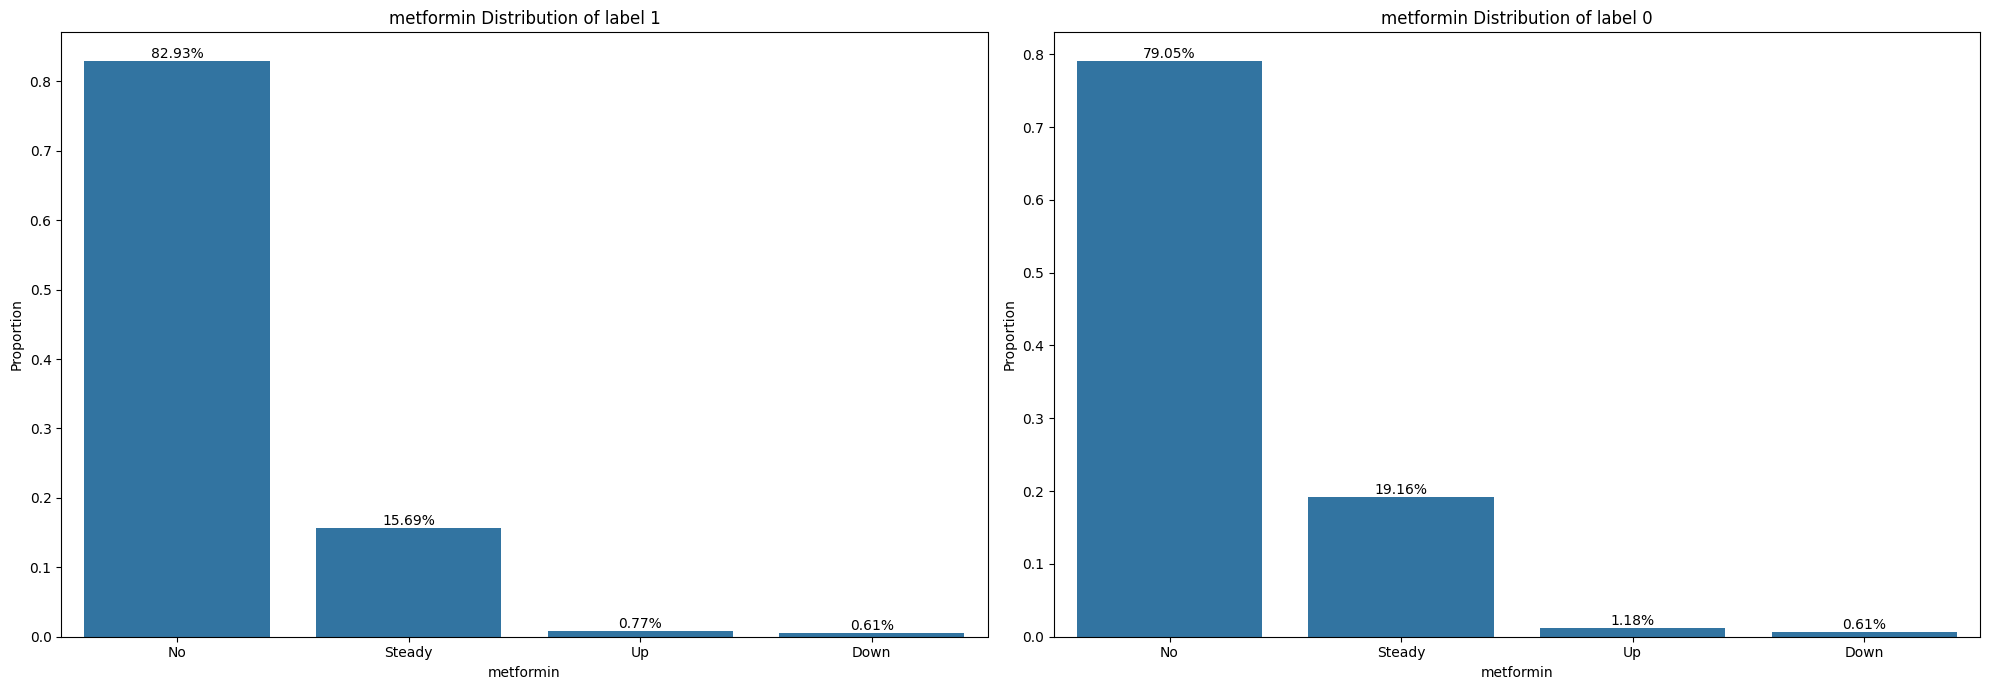

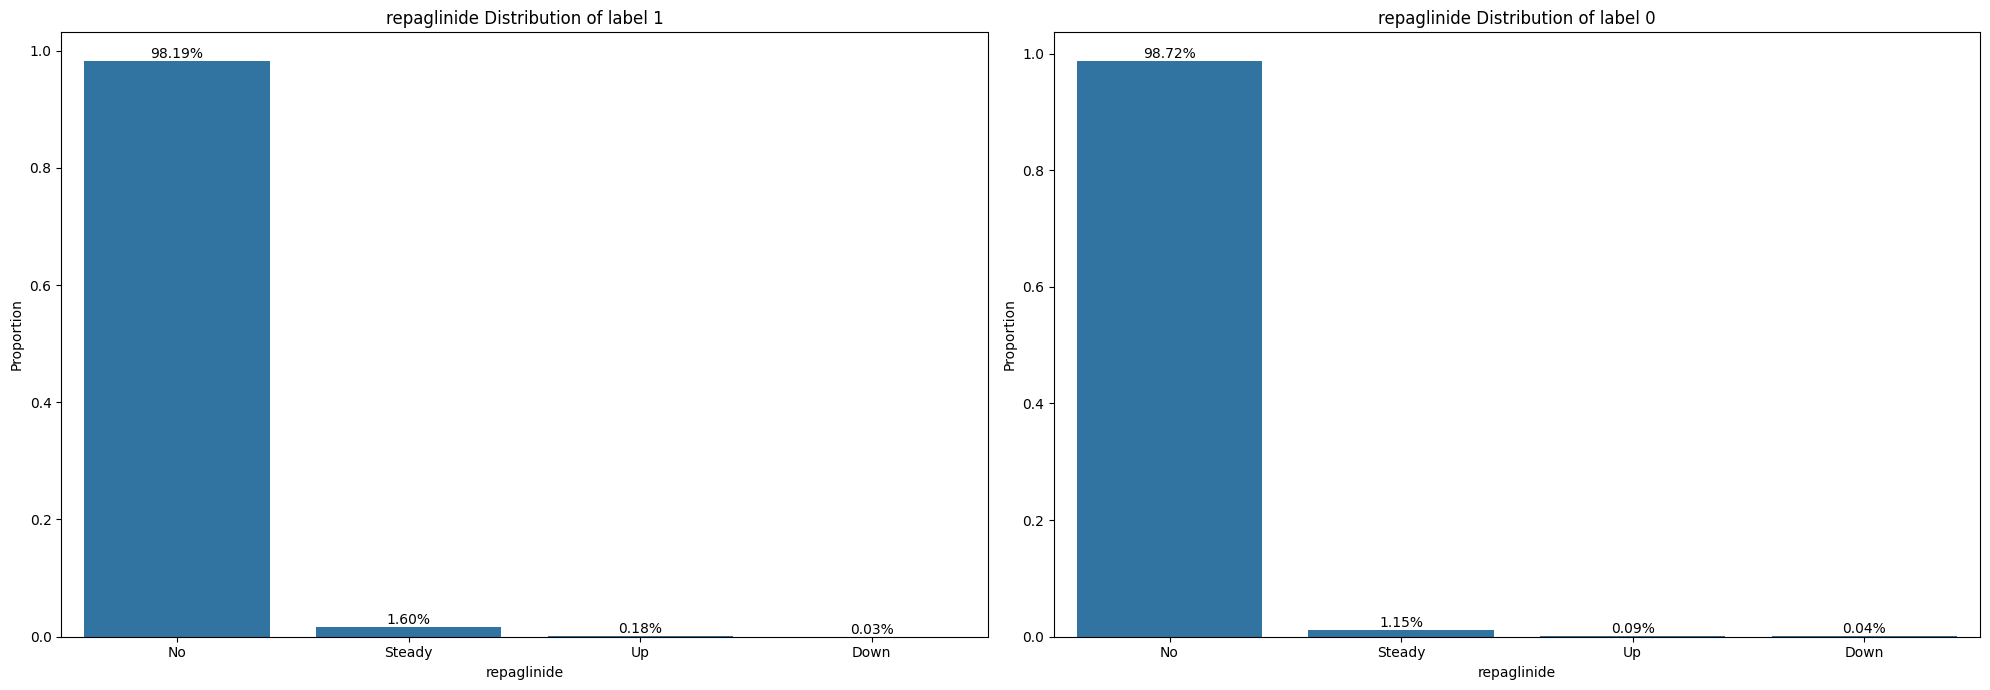

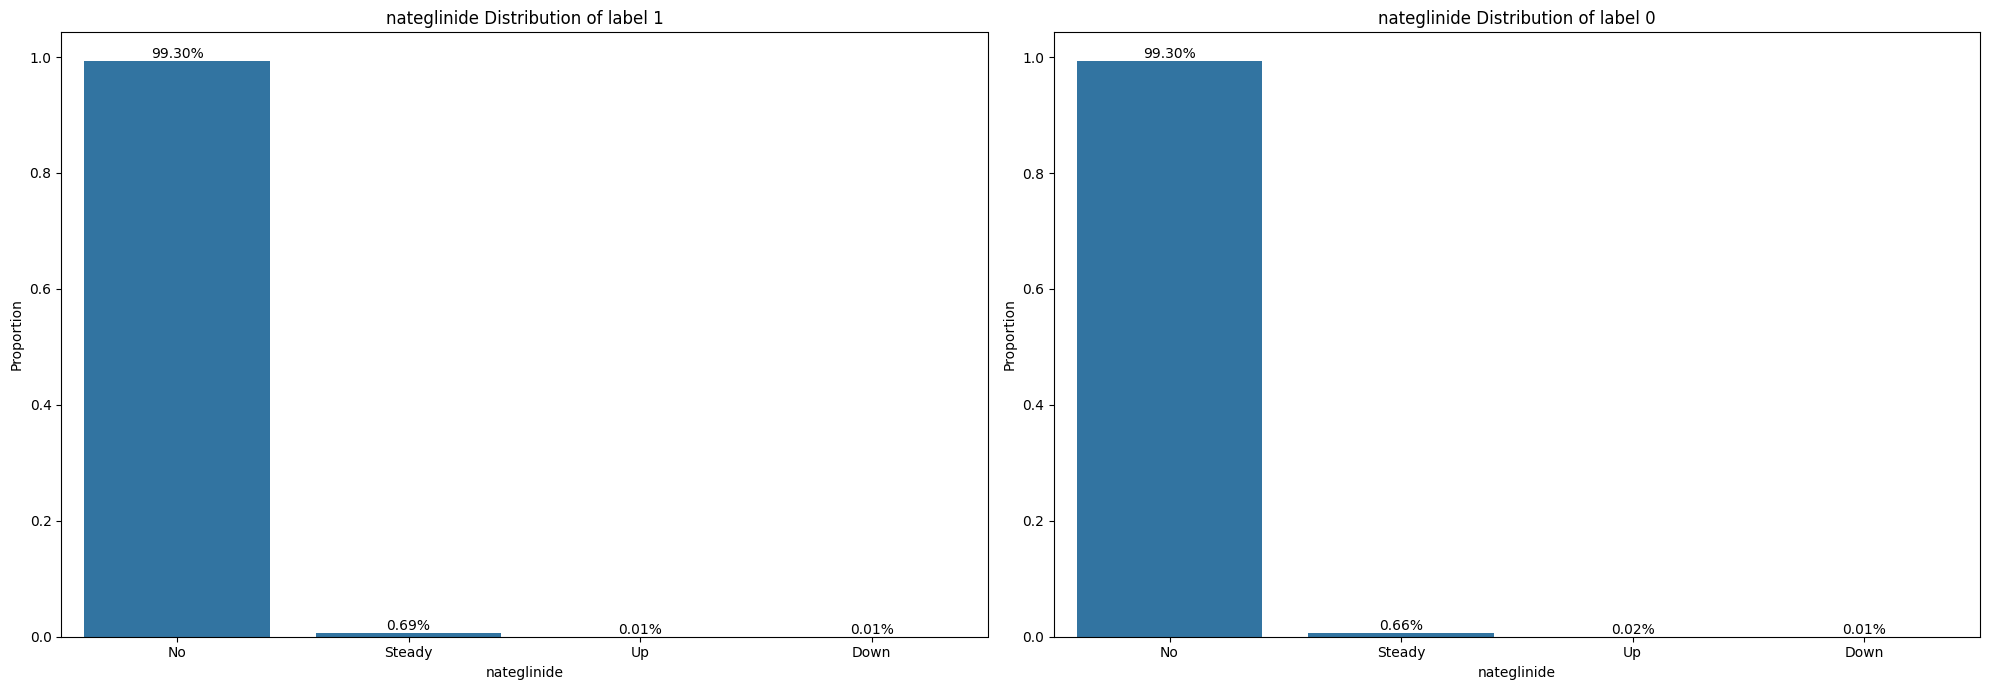

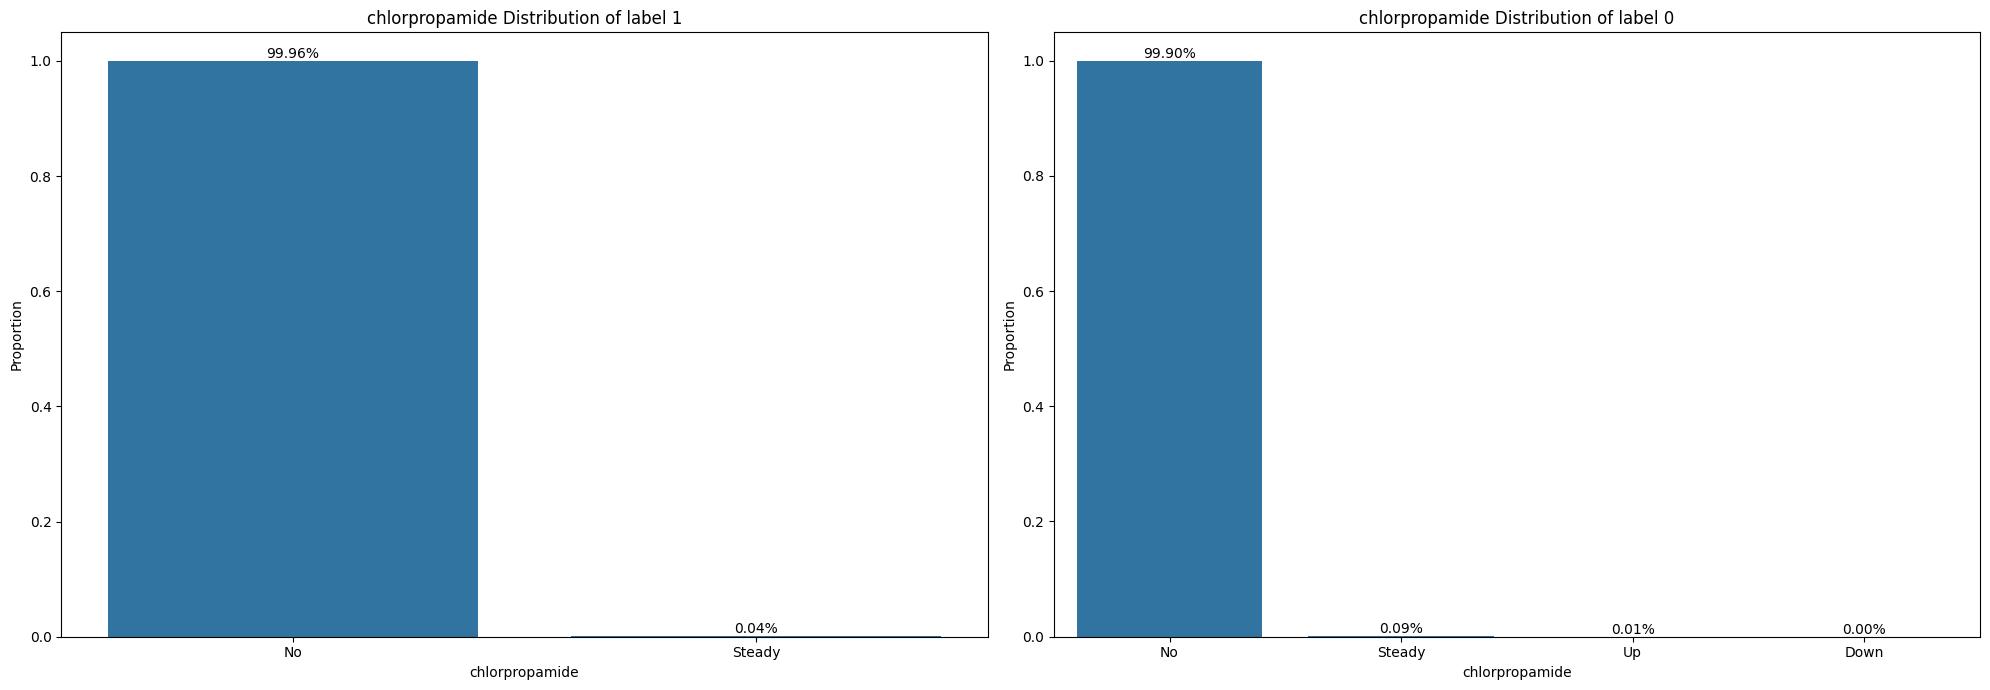

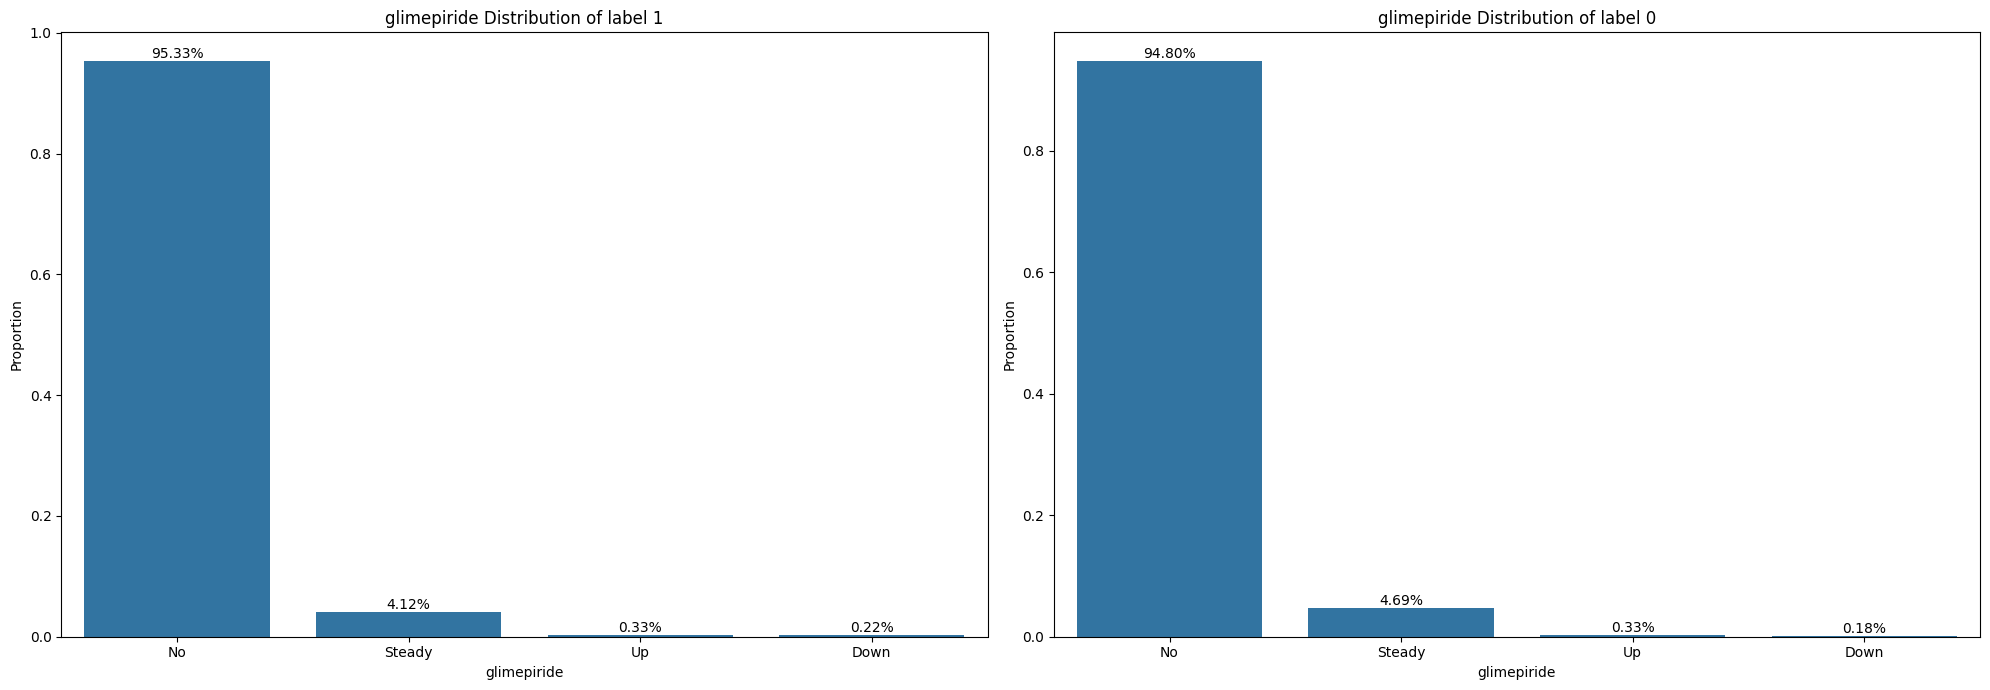

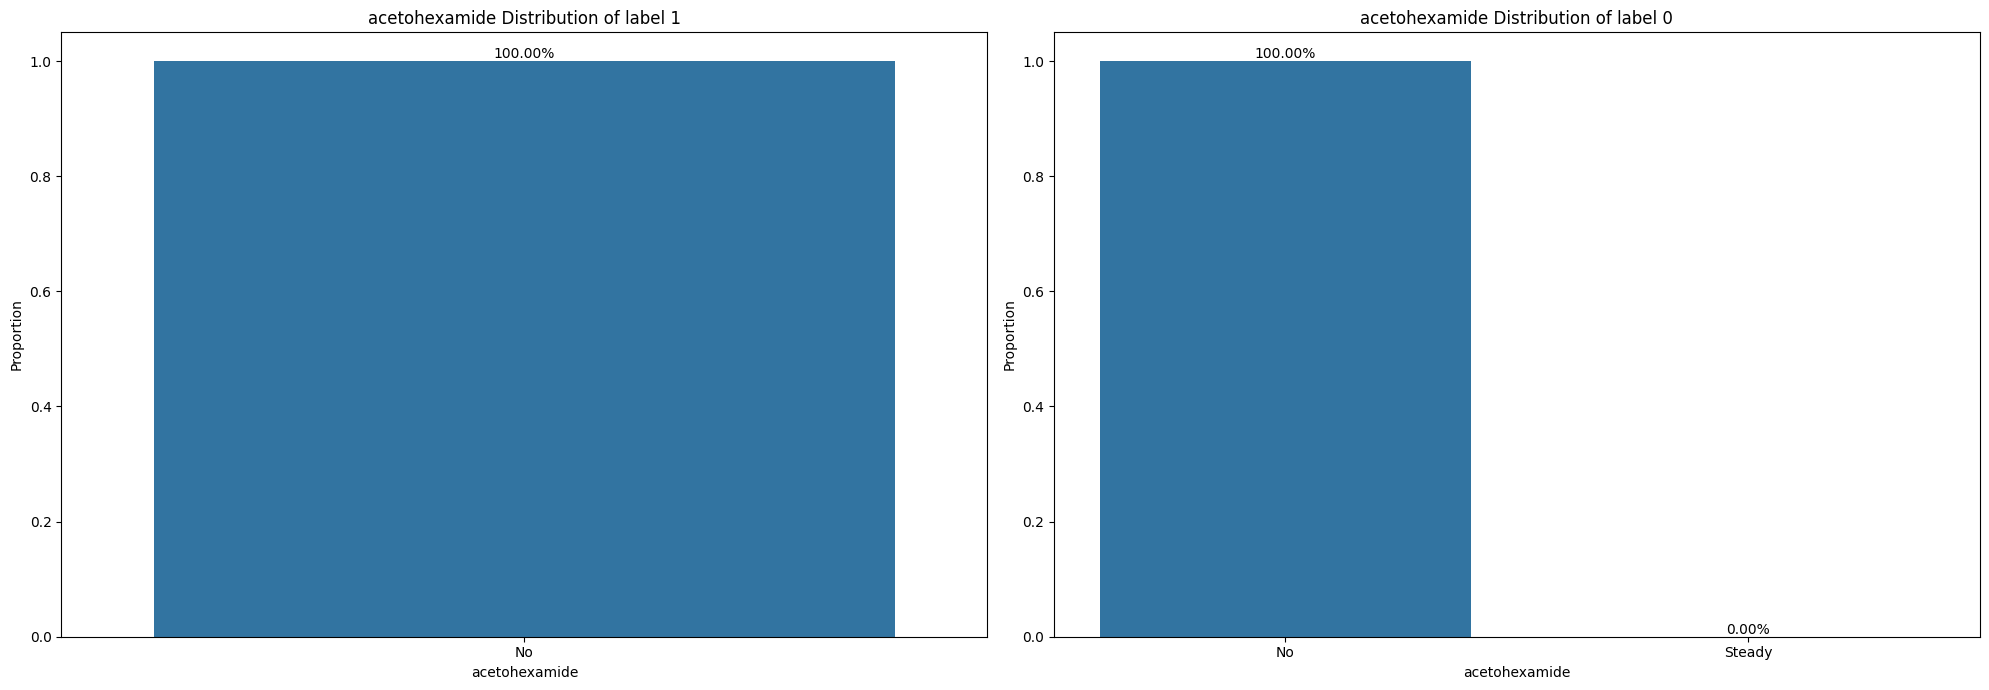

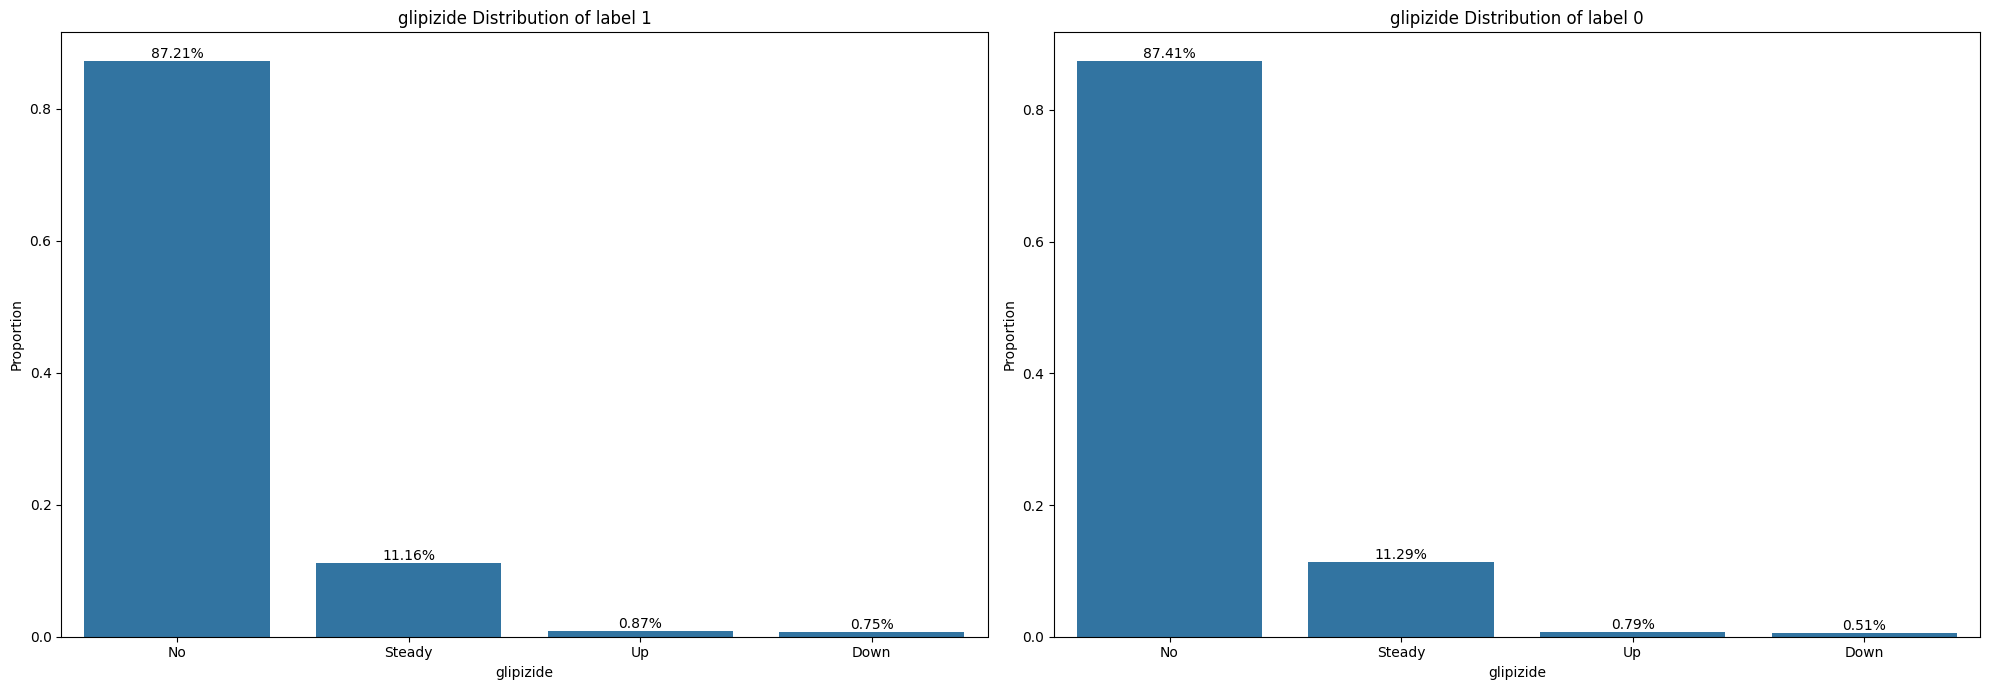

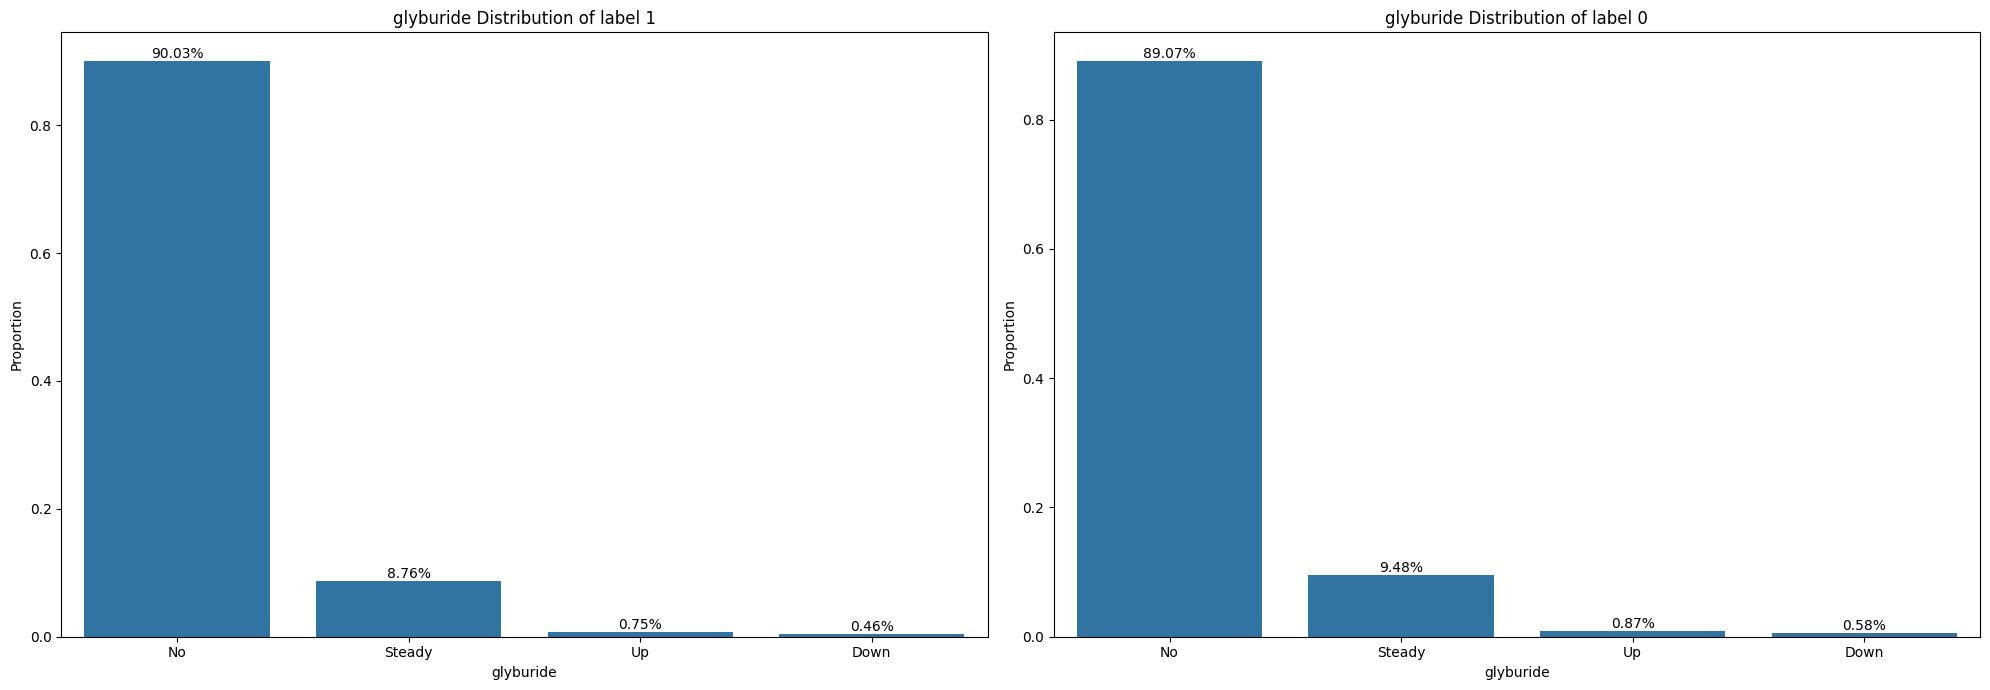

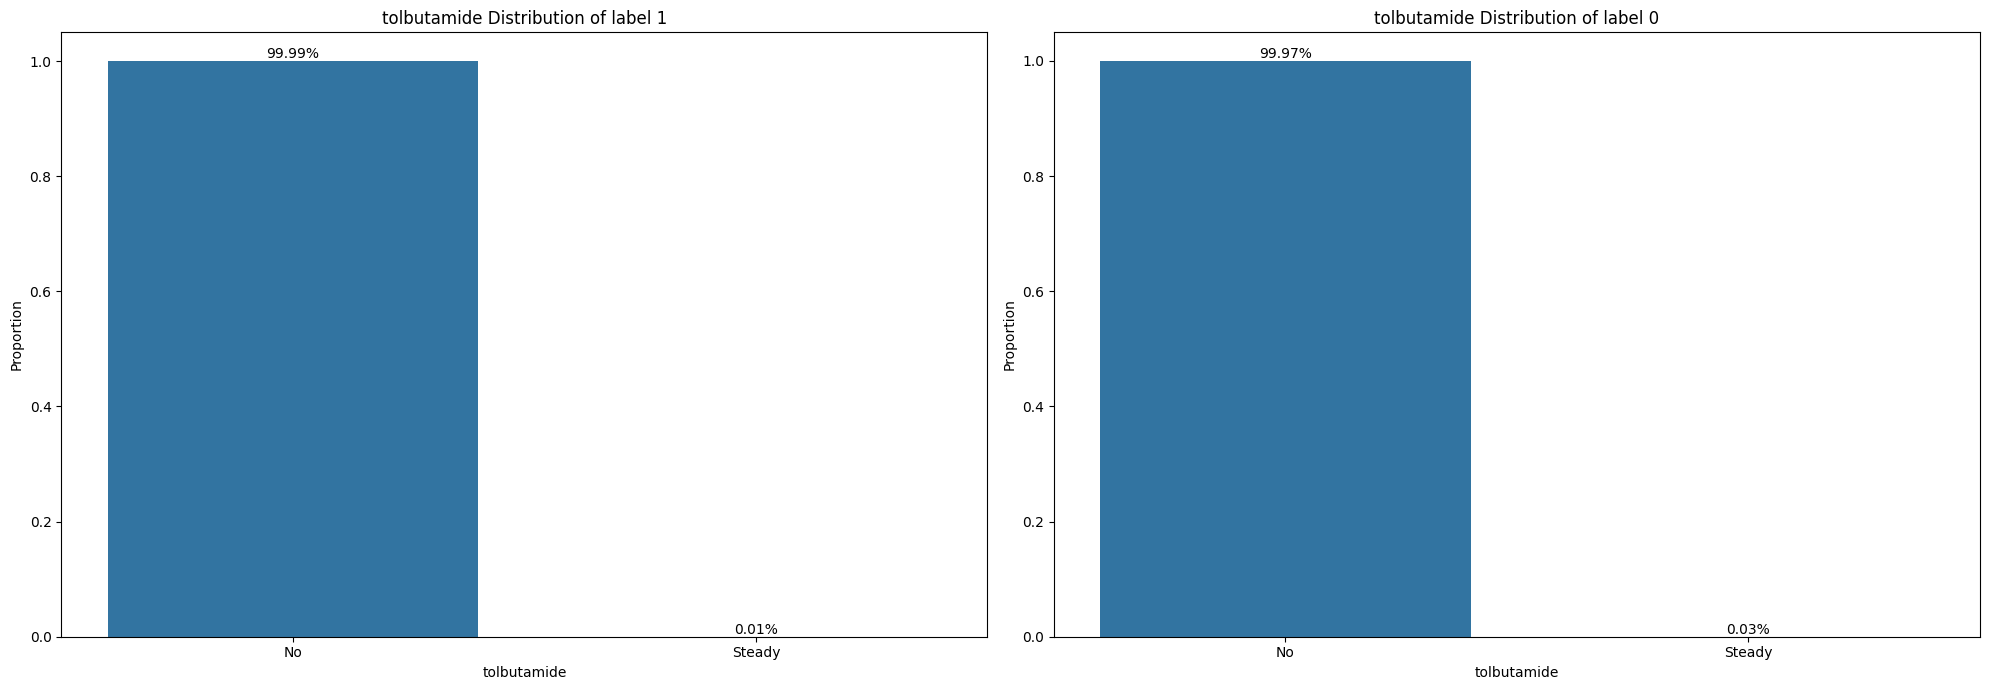

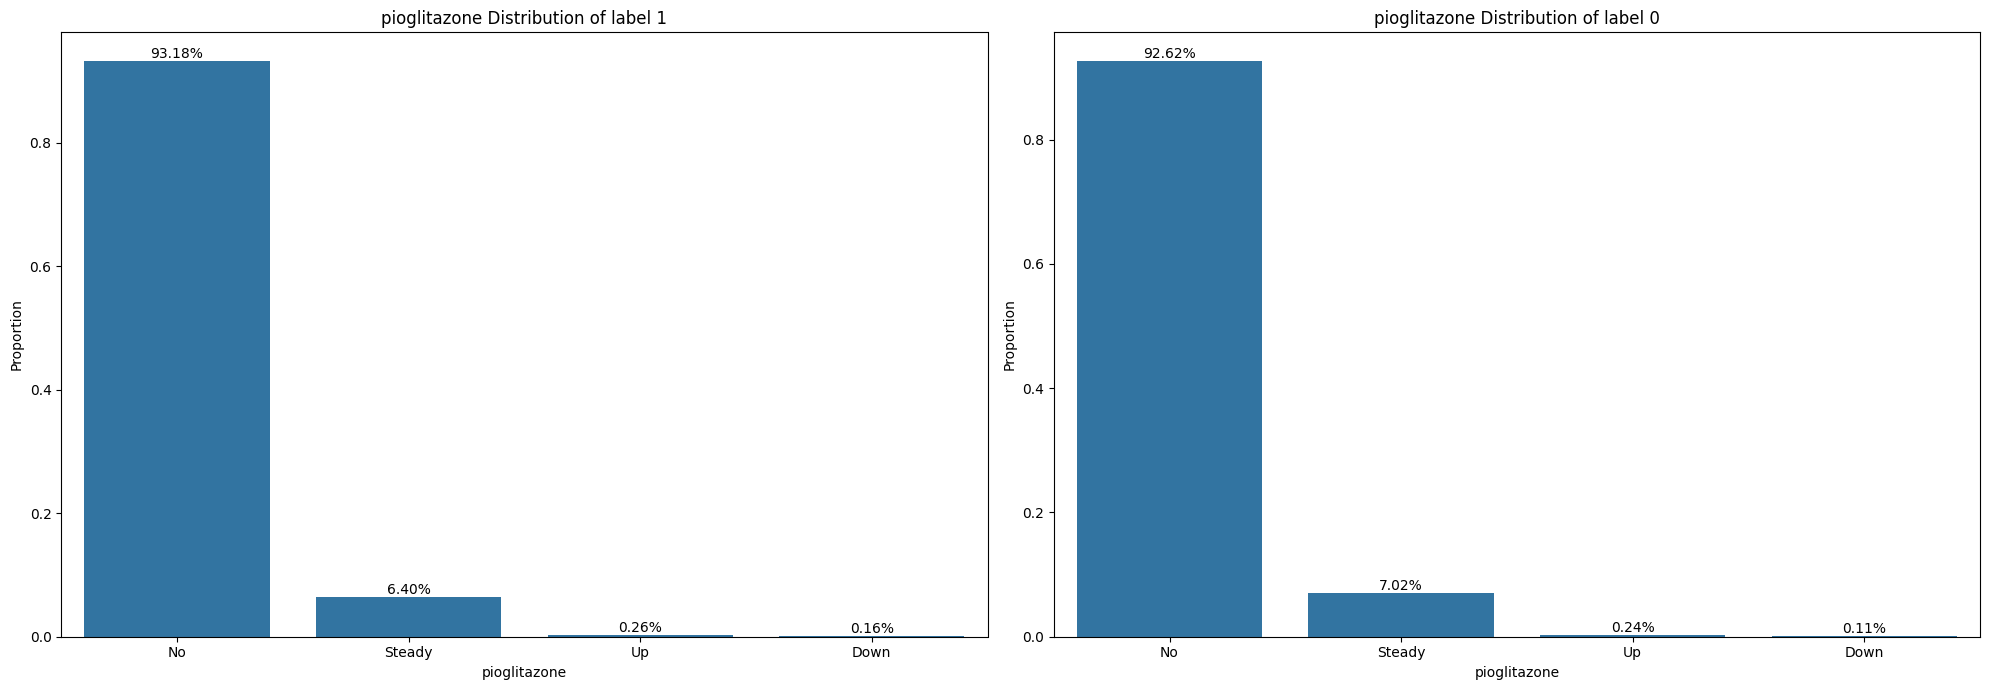

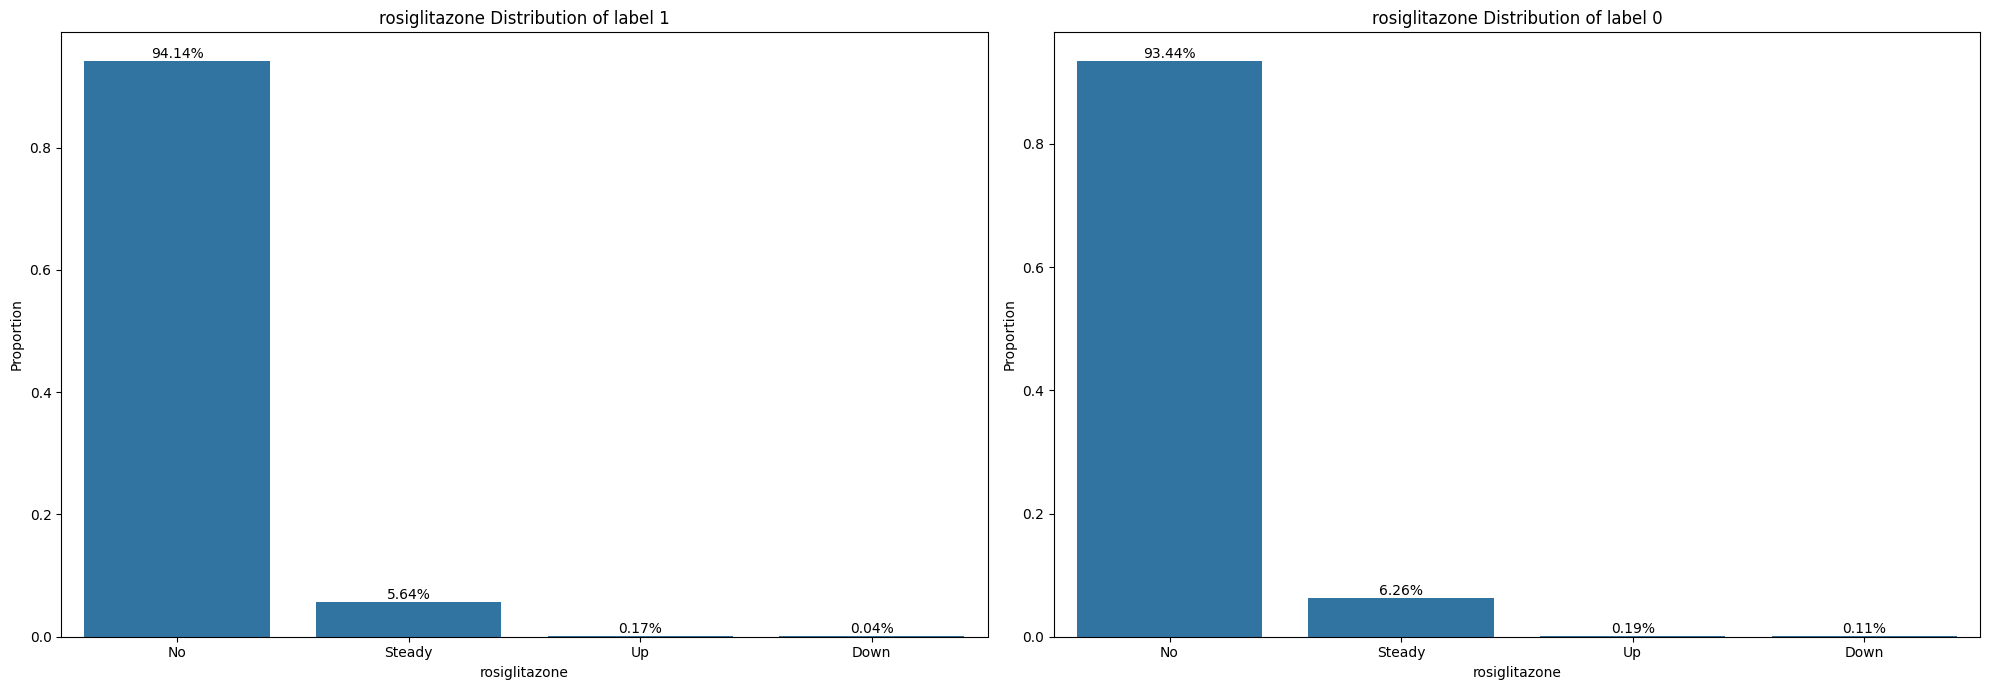

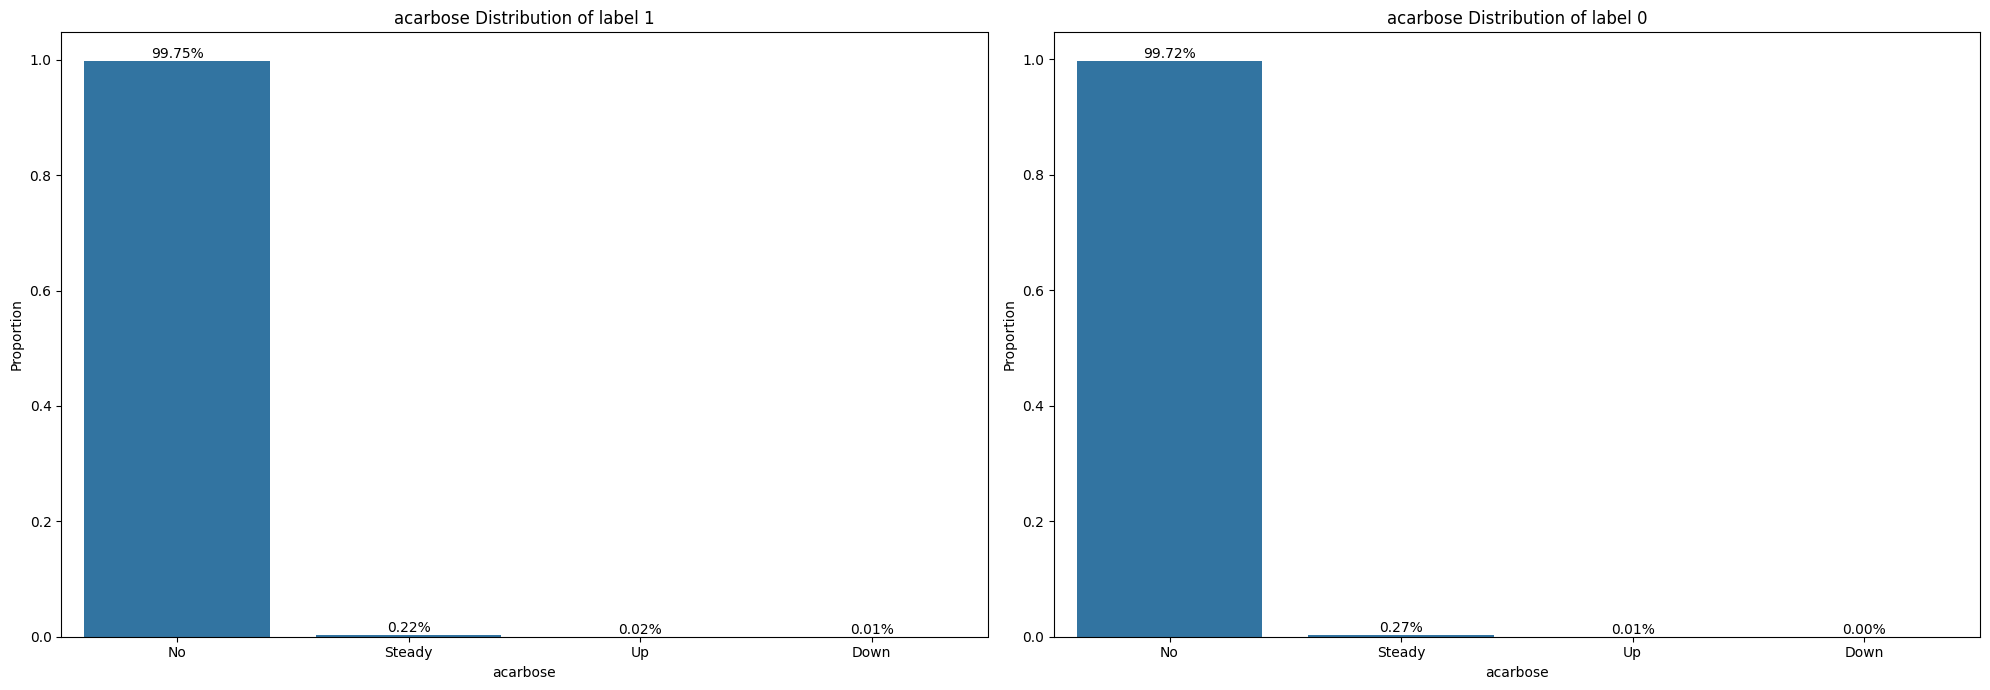

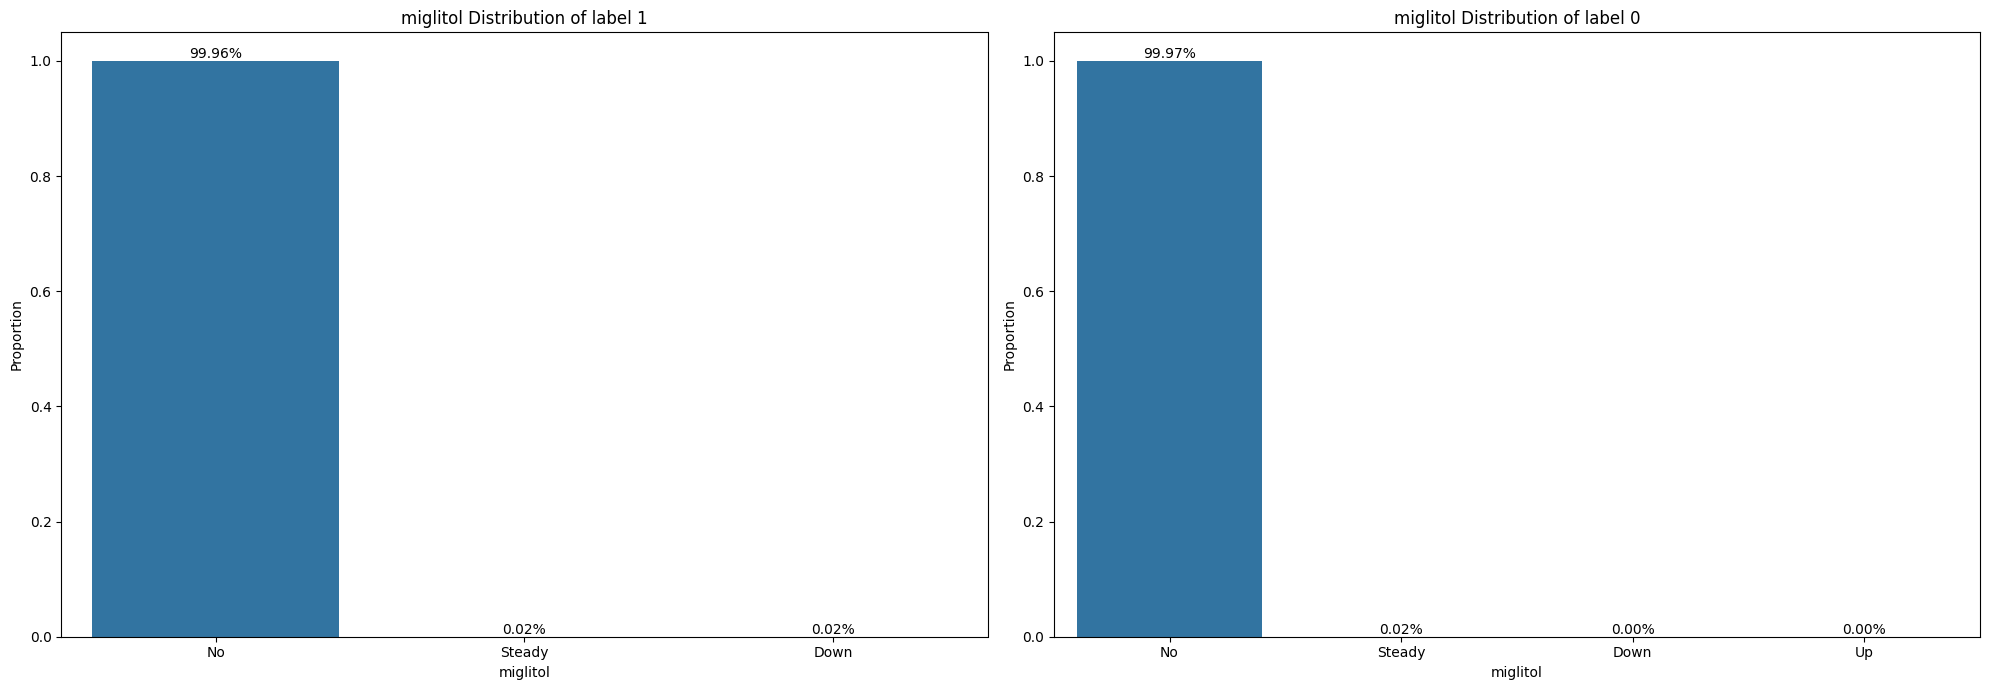

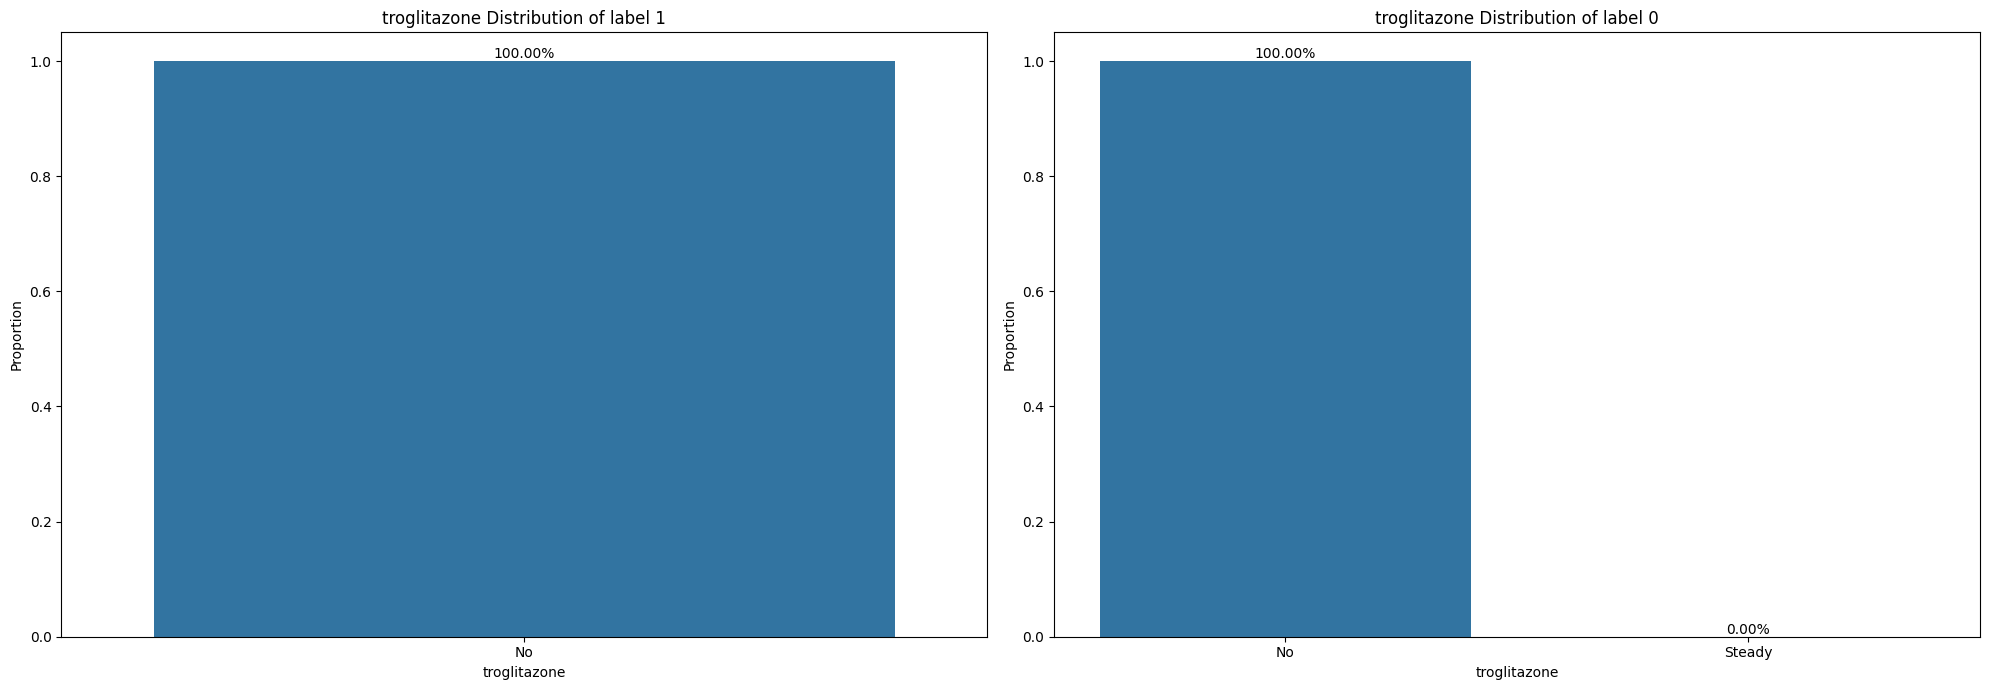

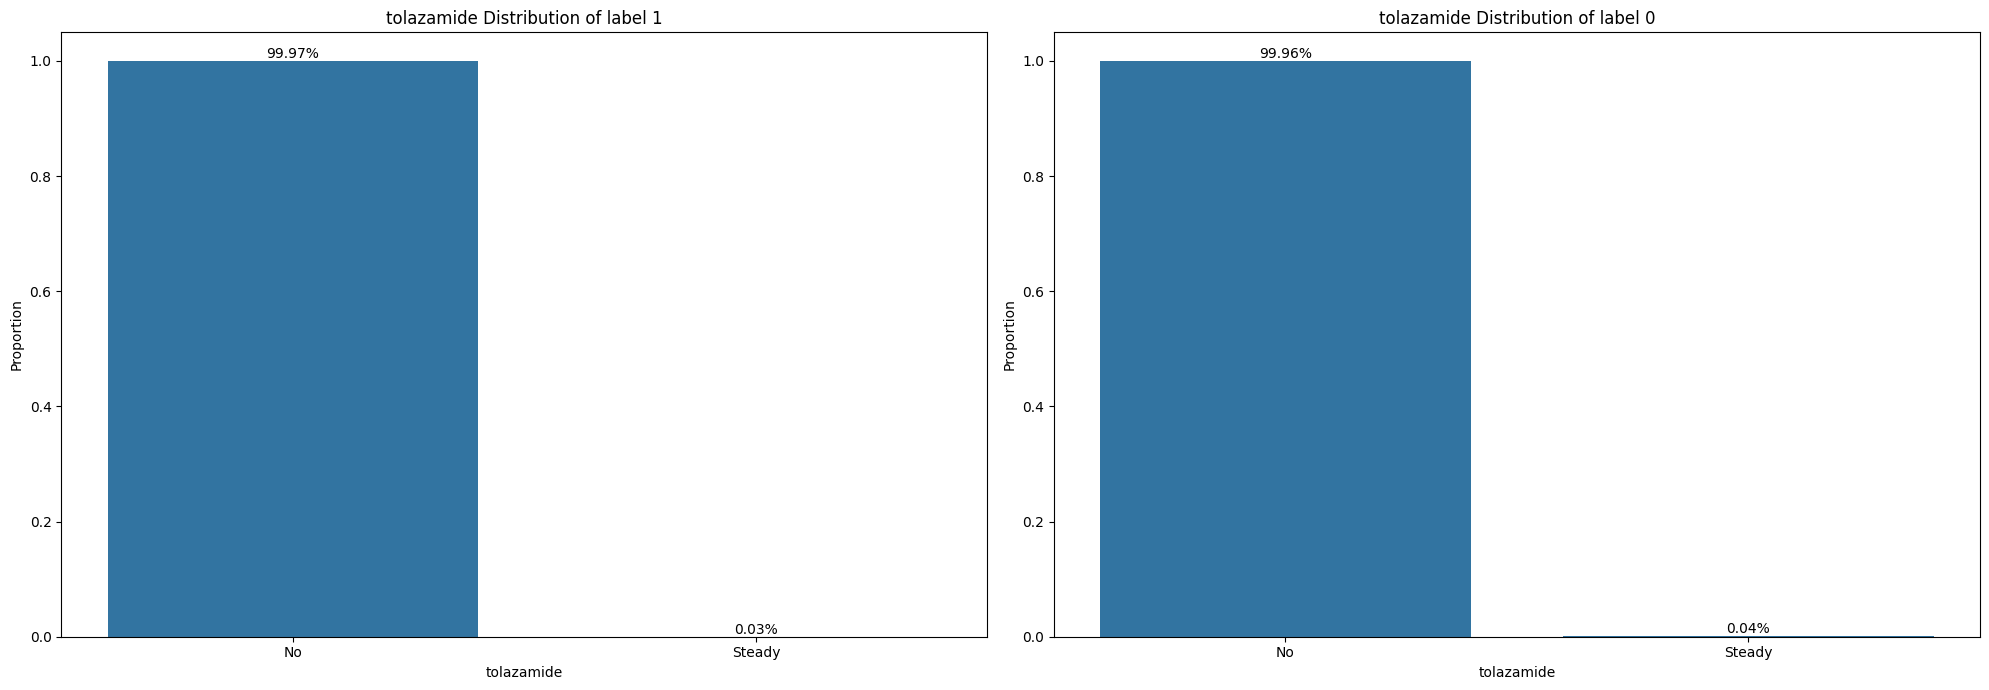

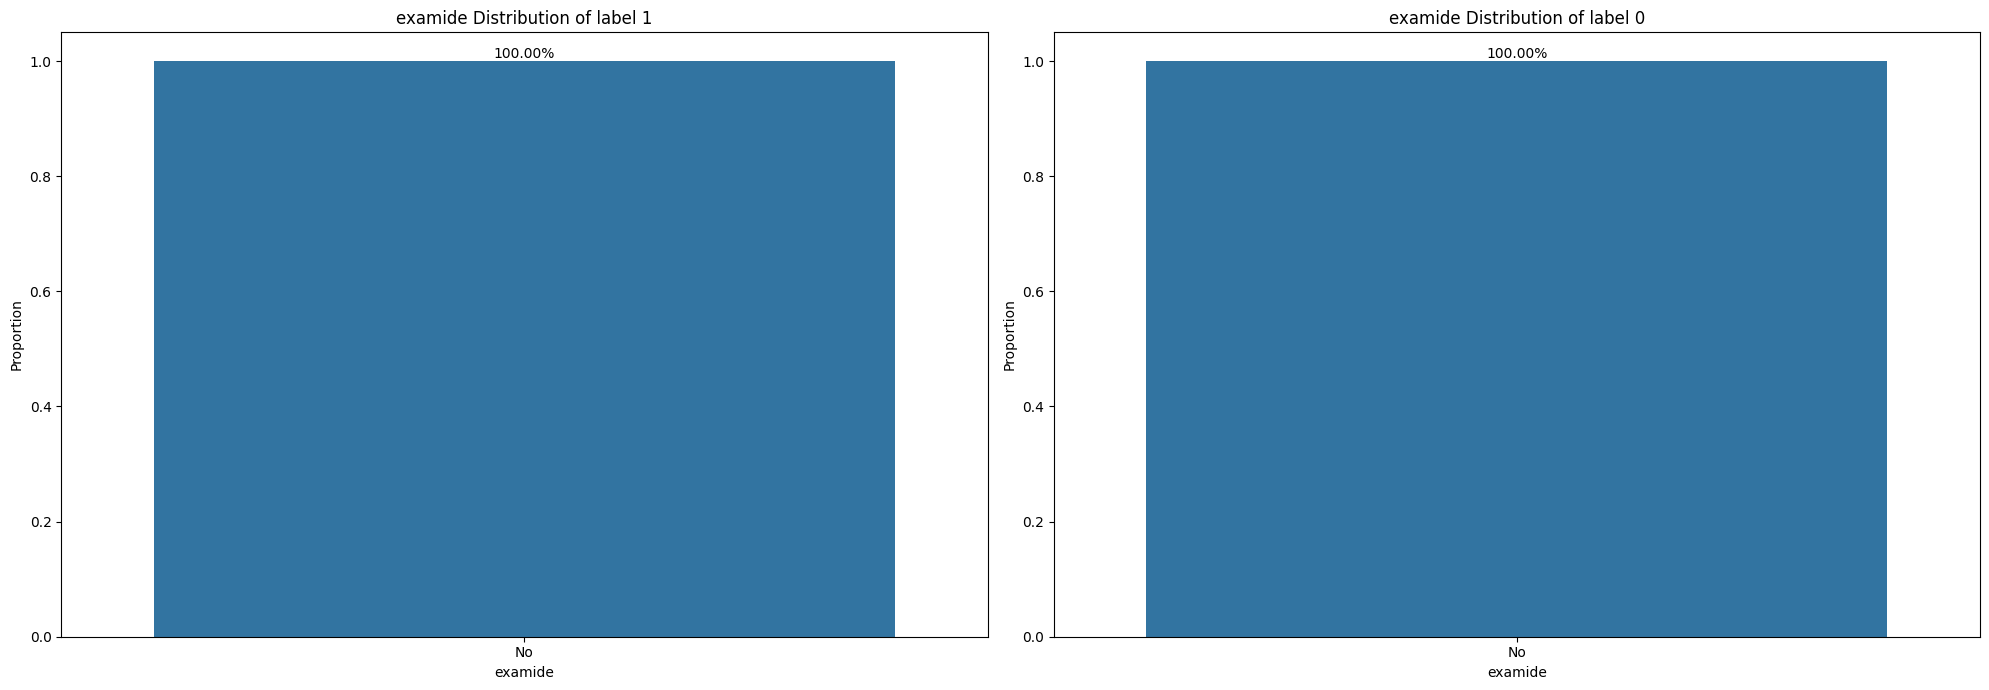

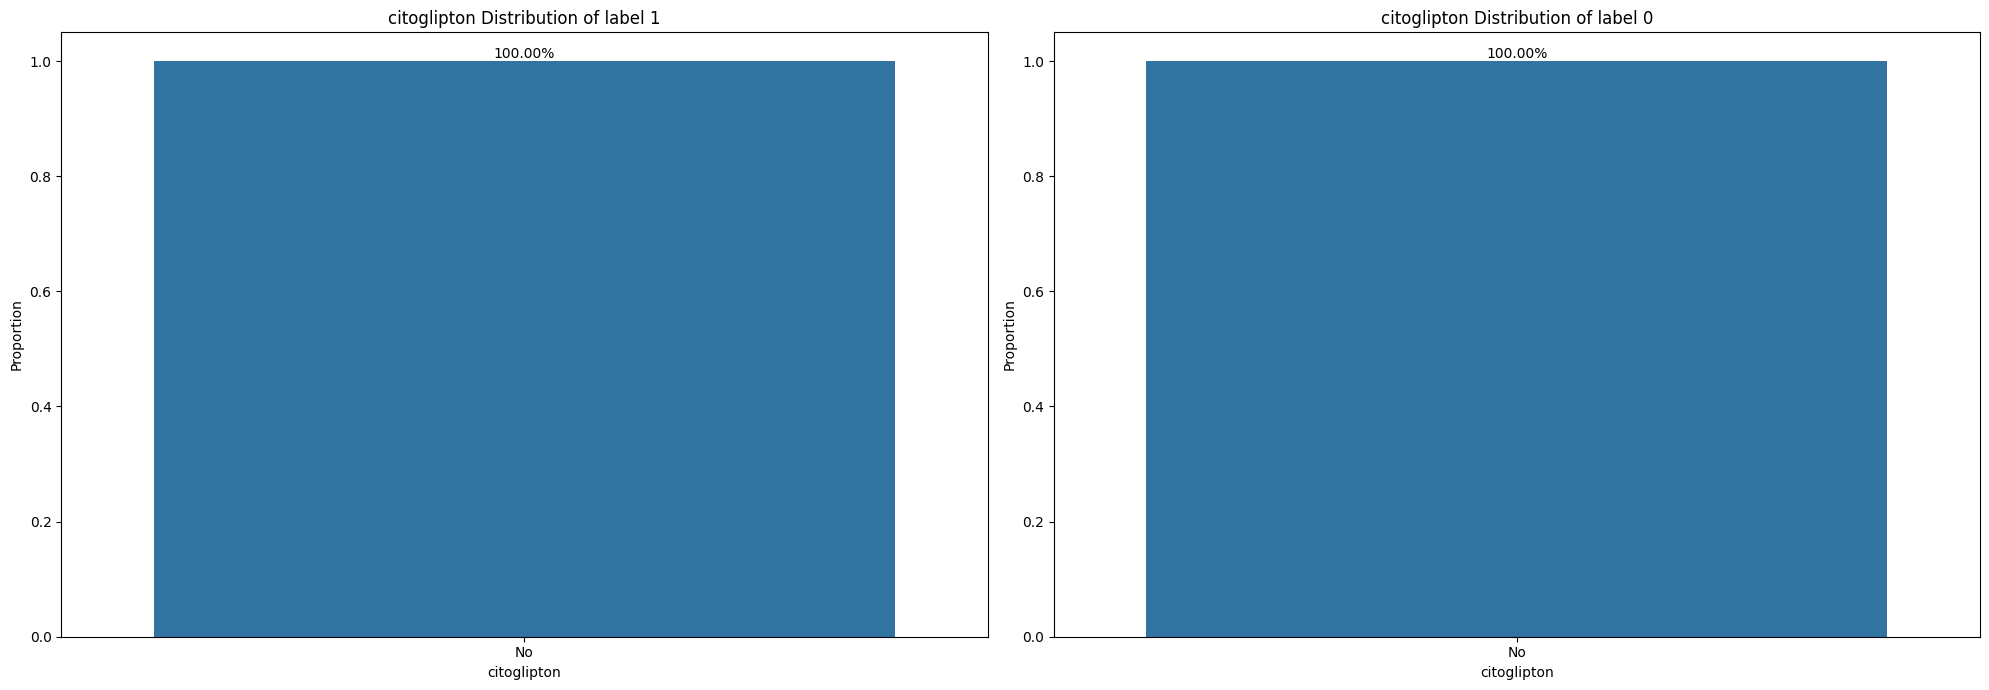

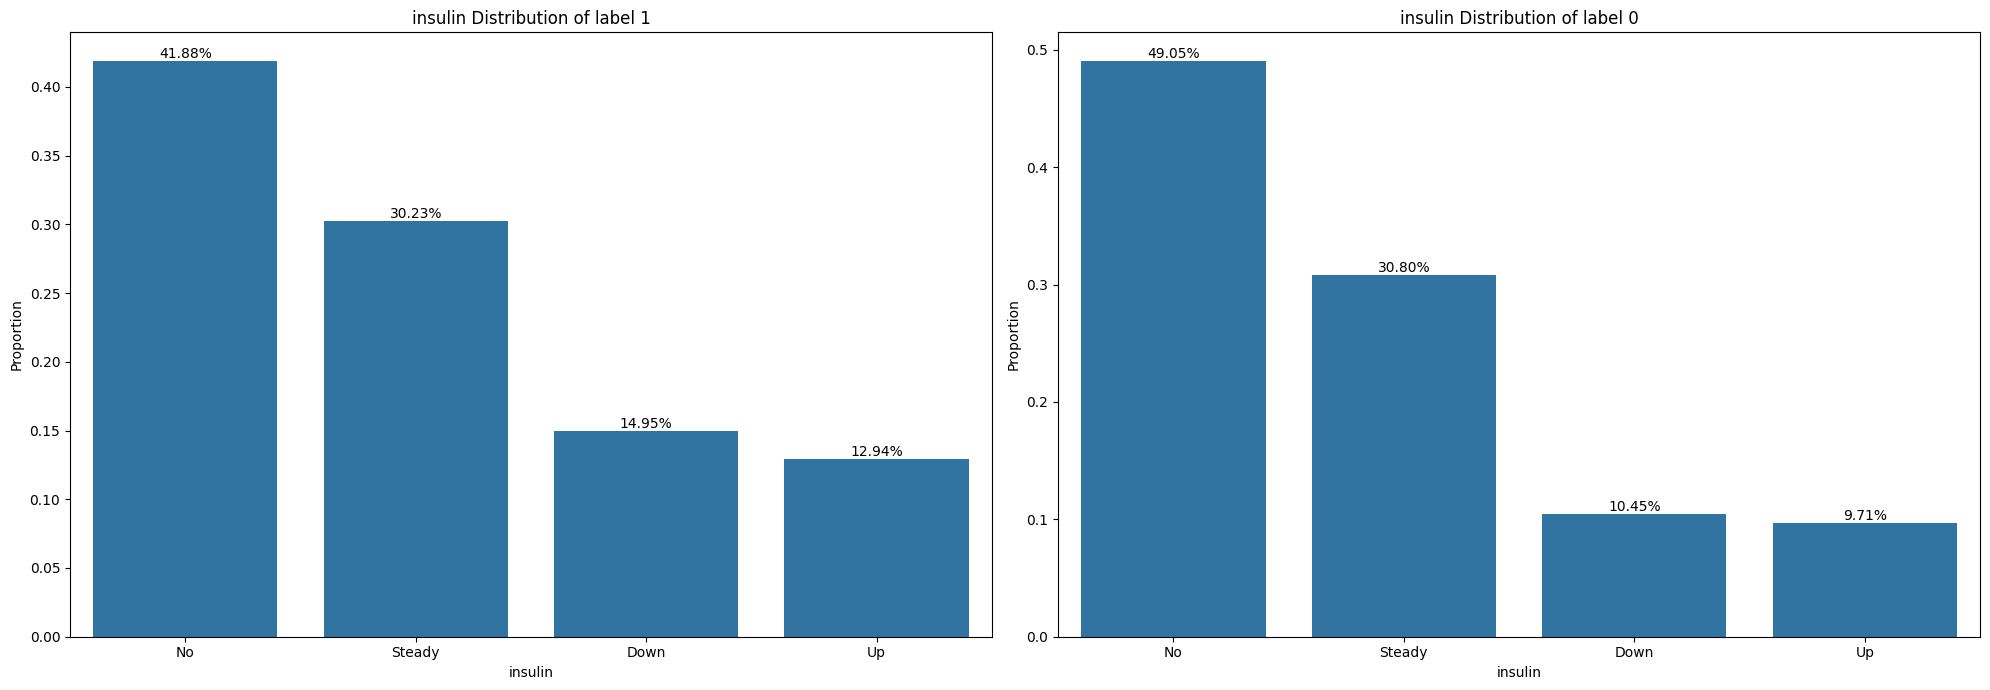

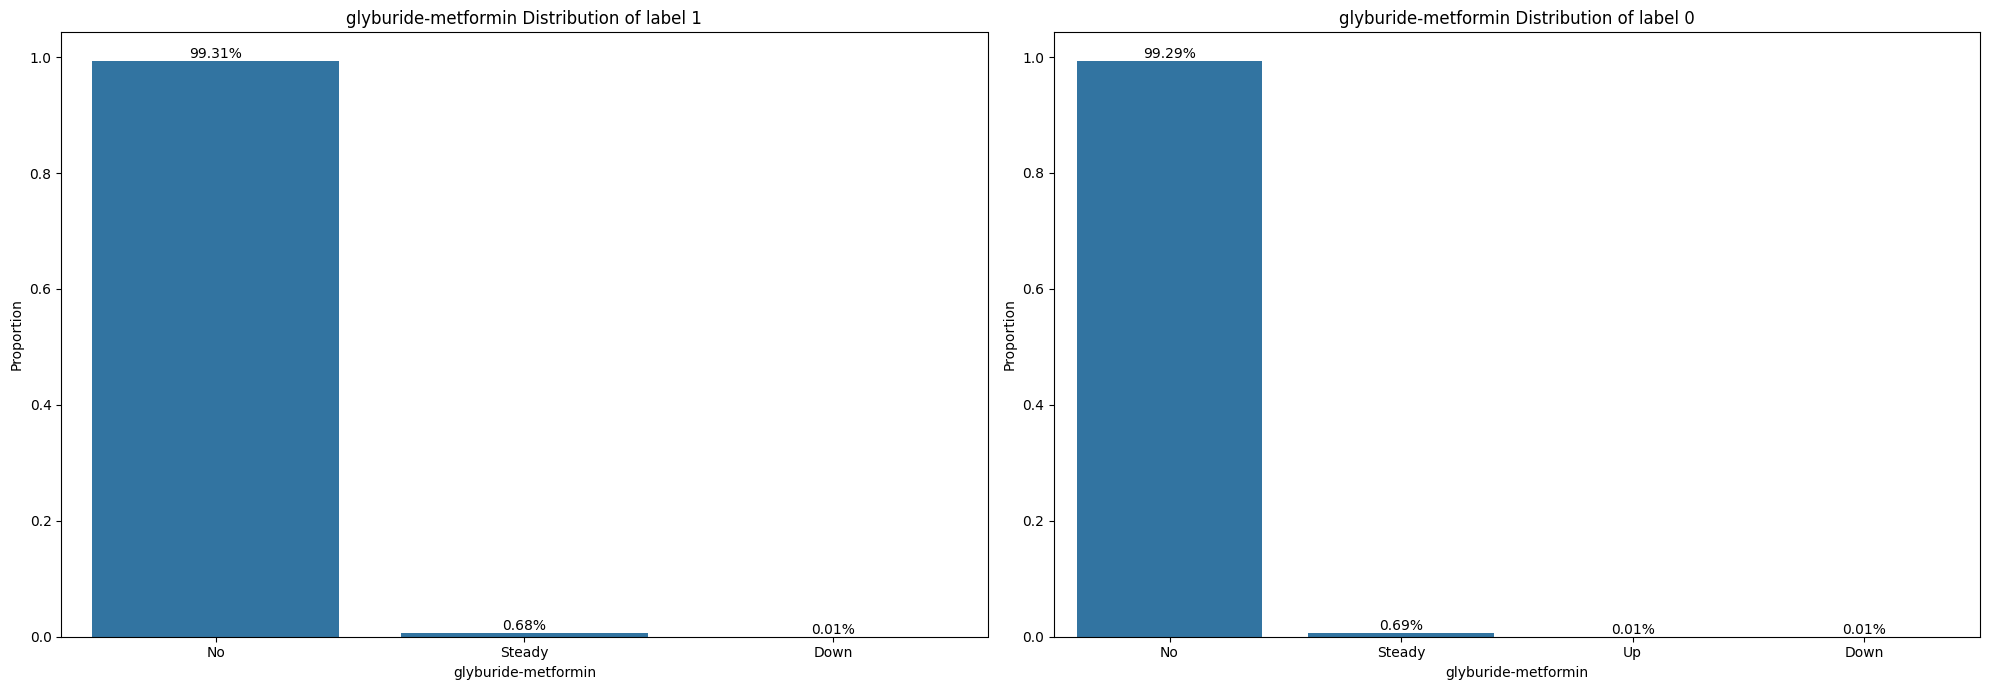

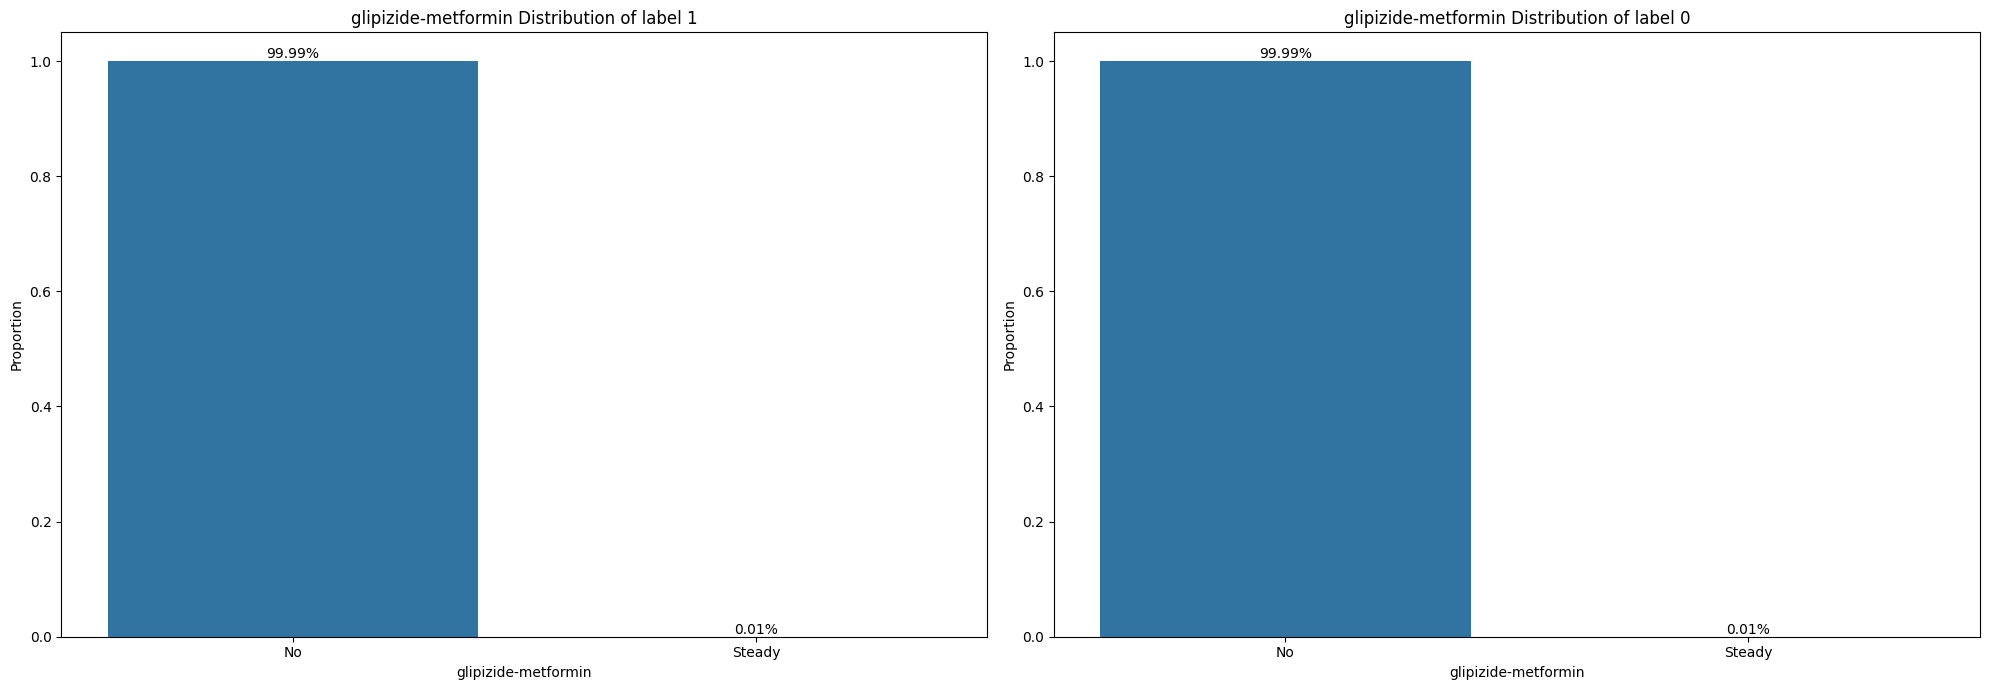

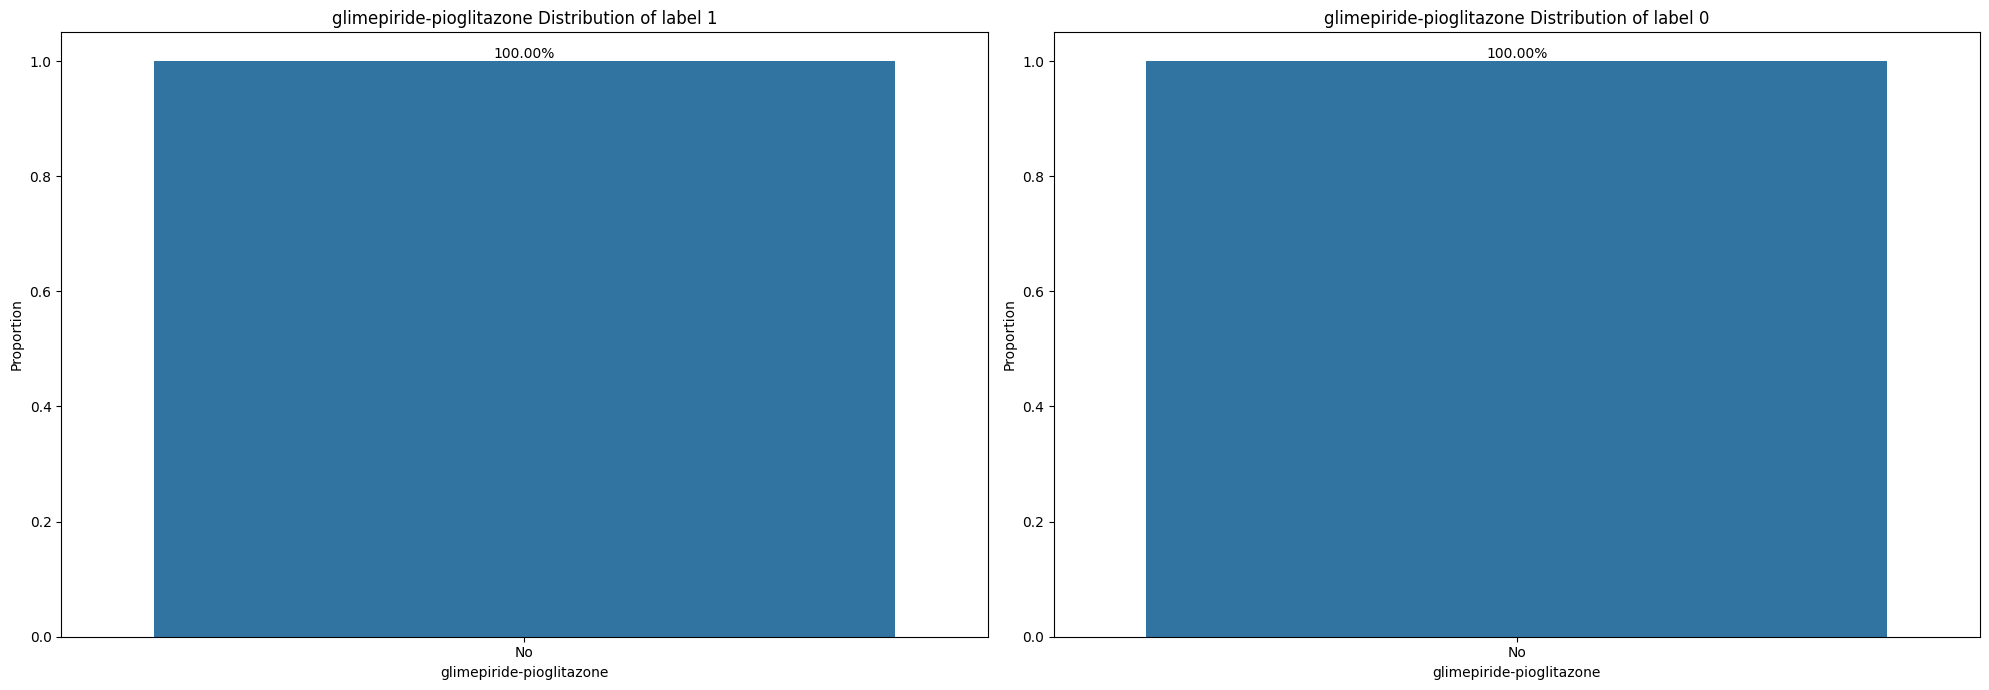

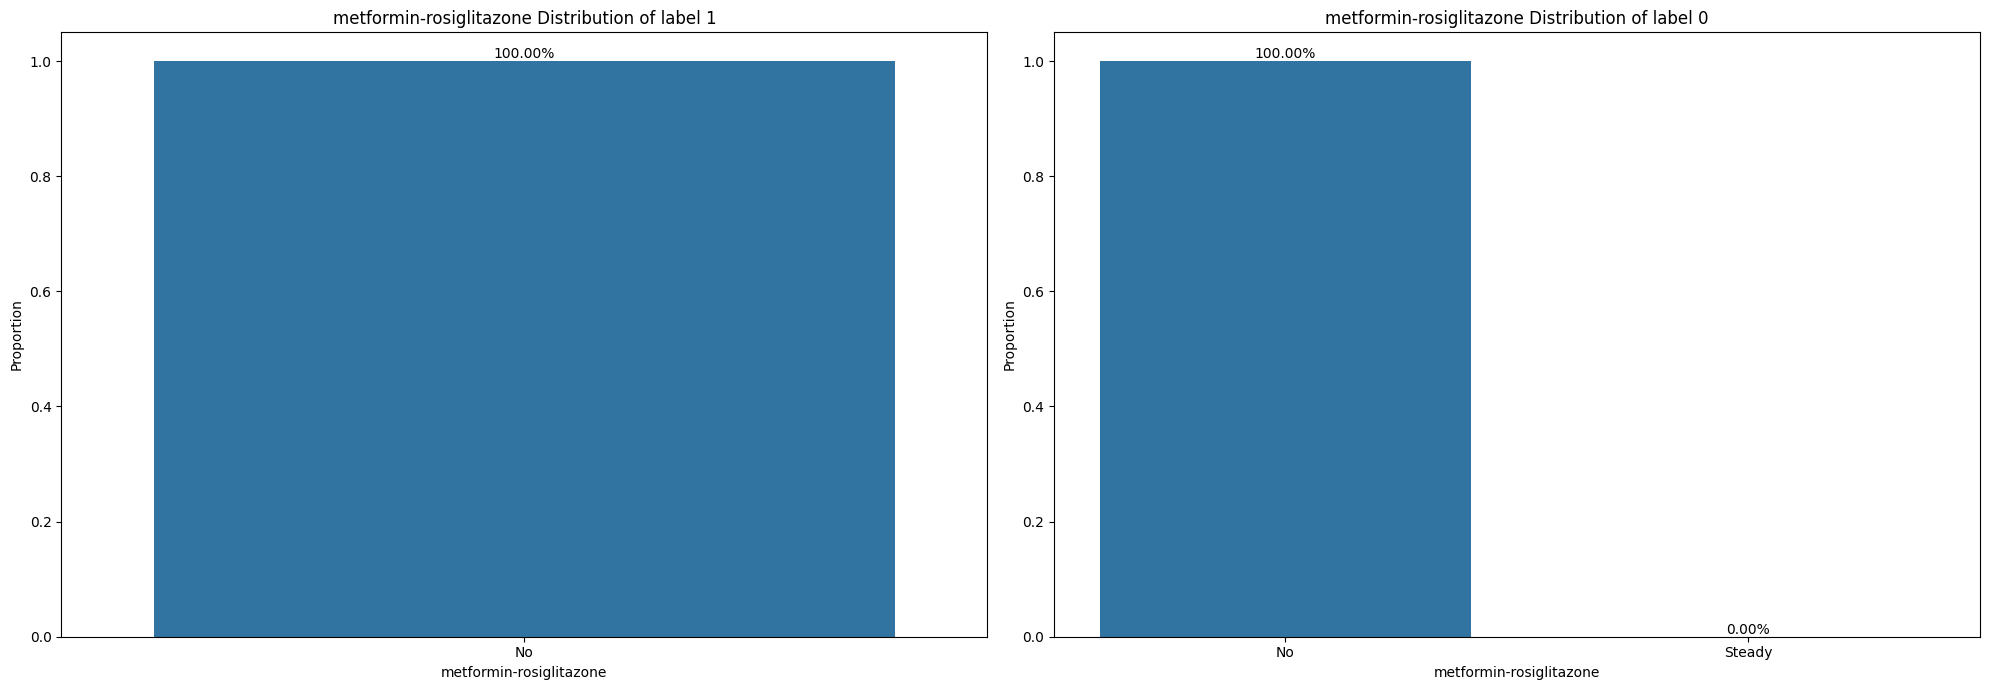

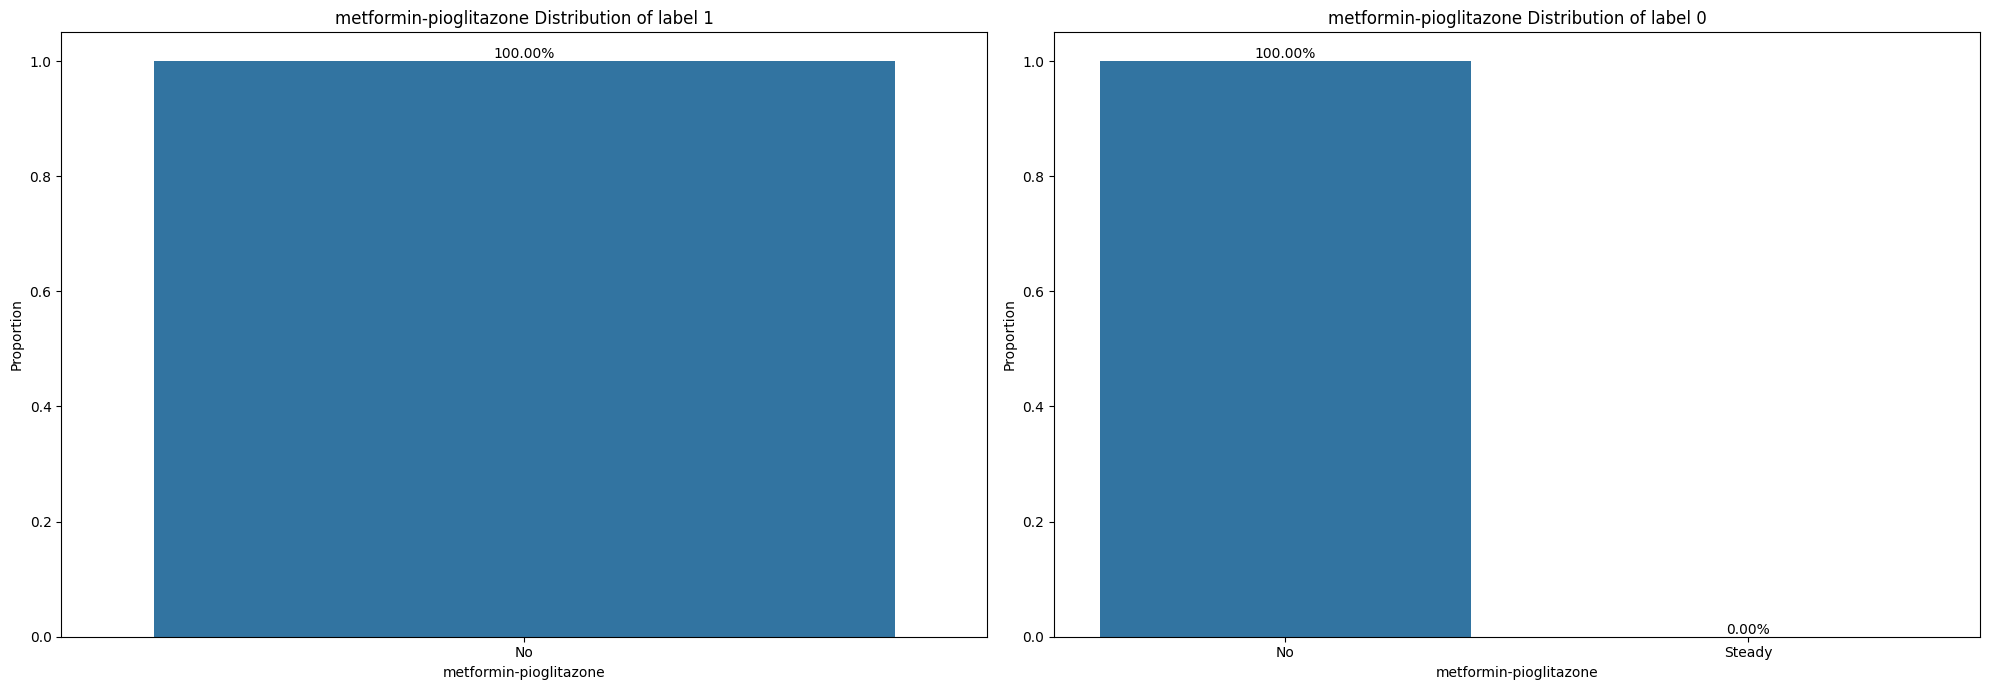

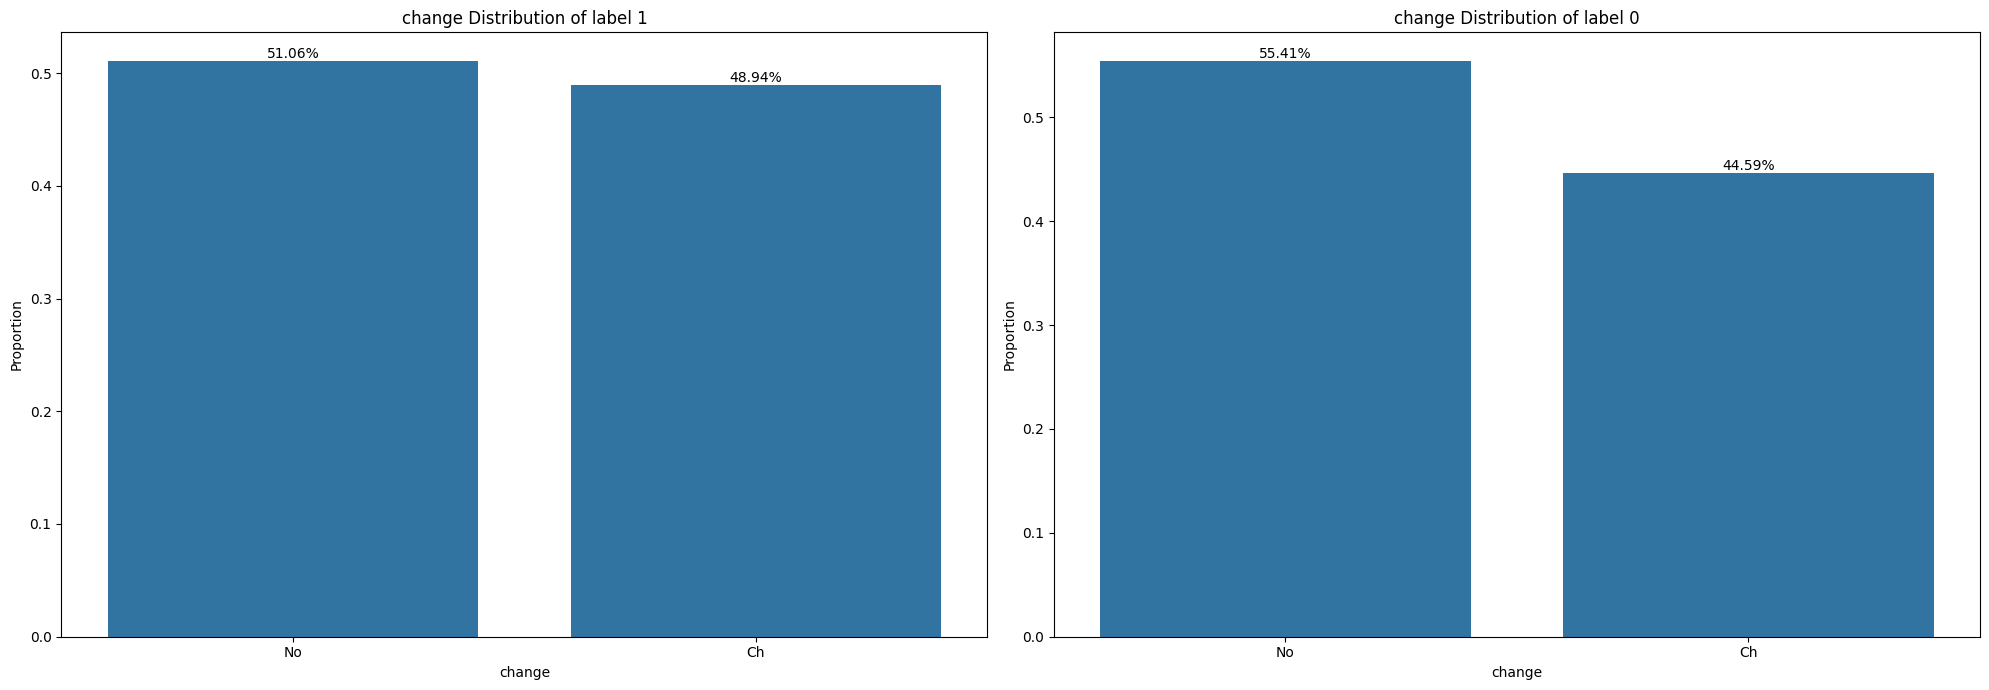

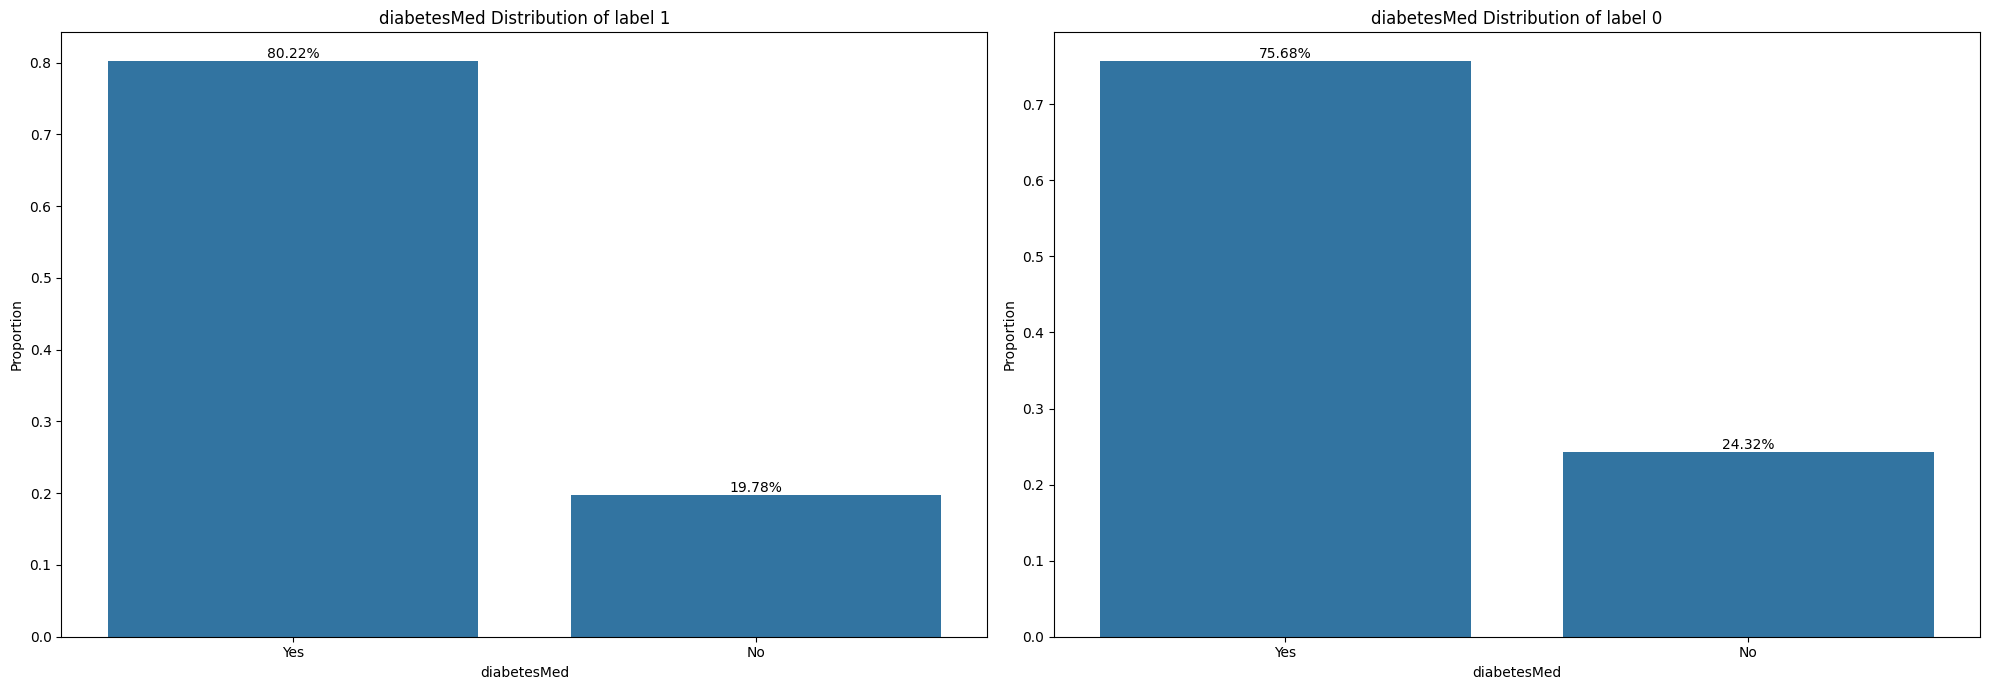

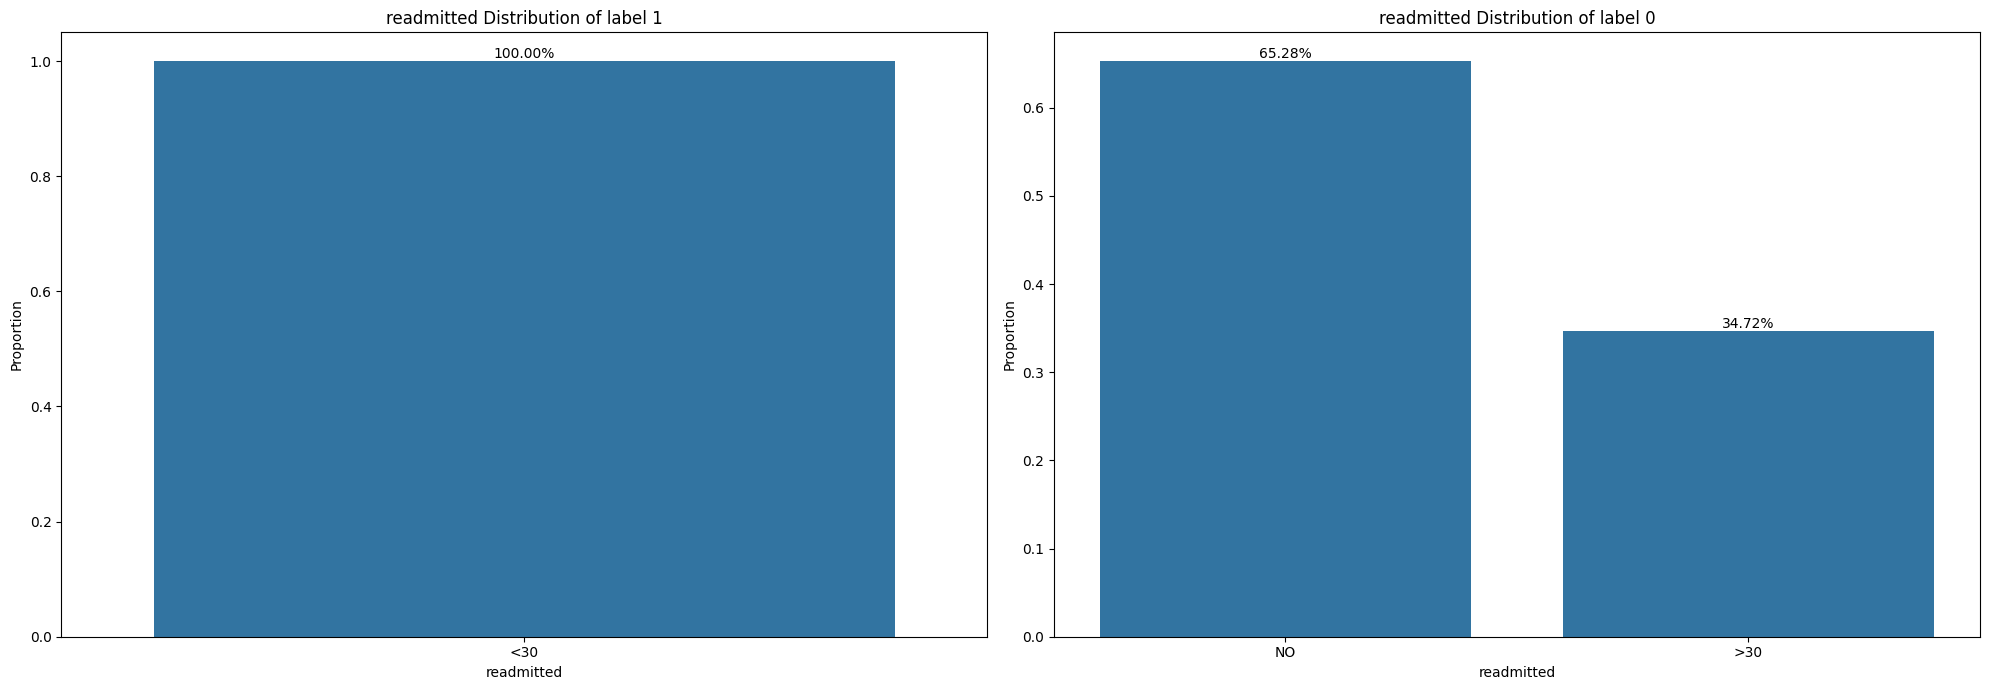

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot to understand the distribution of features for each label

for col in cols_to_plot.index:
    plt.figure(figsize=(20,7))
    data1 = df_readmitted_lt30[col].value_counts()/len(df_readmitted_lt30)
    df1 = data1.reset_index()
    df1.columns = ['Category', 'Proportion']
    plt.subplot(1, 2, 1)
    ax1 = sns.barplot(x='Category', y='Proportion', data=df1)
    plt.title(f'{col} Distribution of label 1')
    plt.xlabel(f'{col}')
    plt.ylabel('Proportion')

    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x() + p.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom')

    data2 = df_not_readmitted_lt30[col].value_counts()/len(df_not_readmitted_lt30)
    df2 = data2.reset_index()
    df2.columns = ['Category', 'Proportion'] 
    plt.subplot(1, 2, 2)
    ax2 = sns.barplot(x='Category', y='Proportion', data=df2)
    plt.title(f'{col} Distribution of label 0')
    plt.xlabel(f'{col}')
    plt.ylabel('Proportion')

    for p in ax2.patches:
        height = p.get_height()
        ax2.text(p.get_x() + p.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


According to these barplot, we can drop columns that have one values accounting for more than 98% and sign it into *not_useful_features*

## Missing value analysis

In [17]:
not_useful_features = ['repaglinide','nateglinide','chlorpropamide','acetohexamide','tolbutamide','acarbose',
                       'miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin',
                       'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                   'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

In [18]:
# fill none in max_glu_serum and A1Cresult
def modify_value(df):
    # fill none in max_glu_serum and A1Cresult
    df['max_glu_serum'].fillna("none", inplace=True)
    df['A1Cresult'].fillna("none", inplace=True)
    # fill nan in columns containing '?'
    df['race'].replace('?', np.nan, inplace=True)
    df['weight'].replace('?', np.nan, inplace=True)
    df['payer_code'].replace('?', np.nan, inplace=True)
    df['medical_specialty'].replace('?', np.nan, inplace=True)
    df['diag_1'].replace('?', np.nan, inplace=True)
    df['diag_2'].replace('?', np.nan, inplace=True)
    df['diag_3'].replace('?', np.nan, inplace=True)

    return df

diabetes = modify_value(diabetes)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22048\2557459291.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_glu_serum'].fillna("none", inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22048\2557459291.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_values(df):

    cols = df.columns
    count = [df[col].isnull().sum() for col in cols]
    percent = [i/len(df) for i in count]
    missing = pd.DataFrame({'proportion': percent}, index=cols)
    missing = missing.sort_values(by='proportion', ascending=False)
    plt.figure(figsize=(16,40))
    plt.title(f'Missing values on each columns')
    ax = sns.barplot(x=missing['proportion'],y=missing.index)

    for i, p in enumerate(ax.patches):
        ax.text(p.get_x()+p.get_width()+2e-2, p.get_y()+p.get_height(), f"{missing.iloc[i]['proportion']:.3f}%",ha = 'center')
        
    mean = np.mean(missing['proportion'])
    std = np.std(missing['proportion'])
    plt.ylabel('Columns')
    plt.plot([], [], ' ', label=f'Average missing values: {mean:.2f} \u00B1 {std:.2f}')
    plt.legend()
    plt.show()

    return missing, missing.index.tolist()

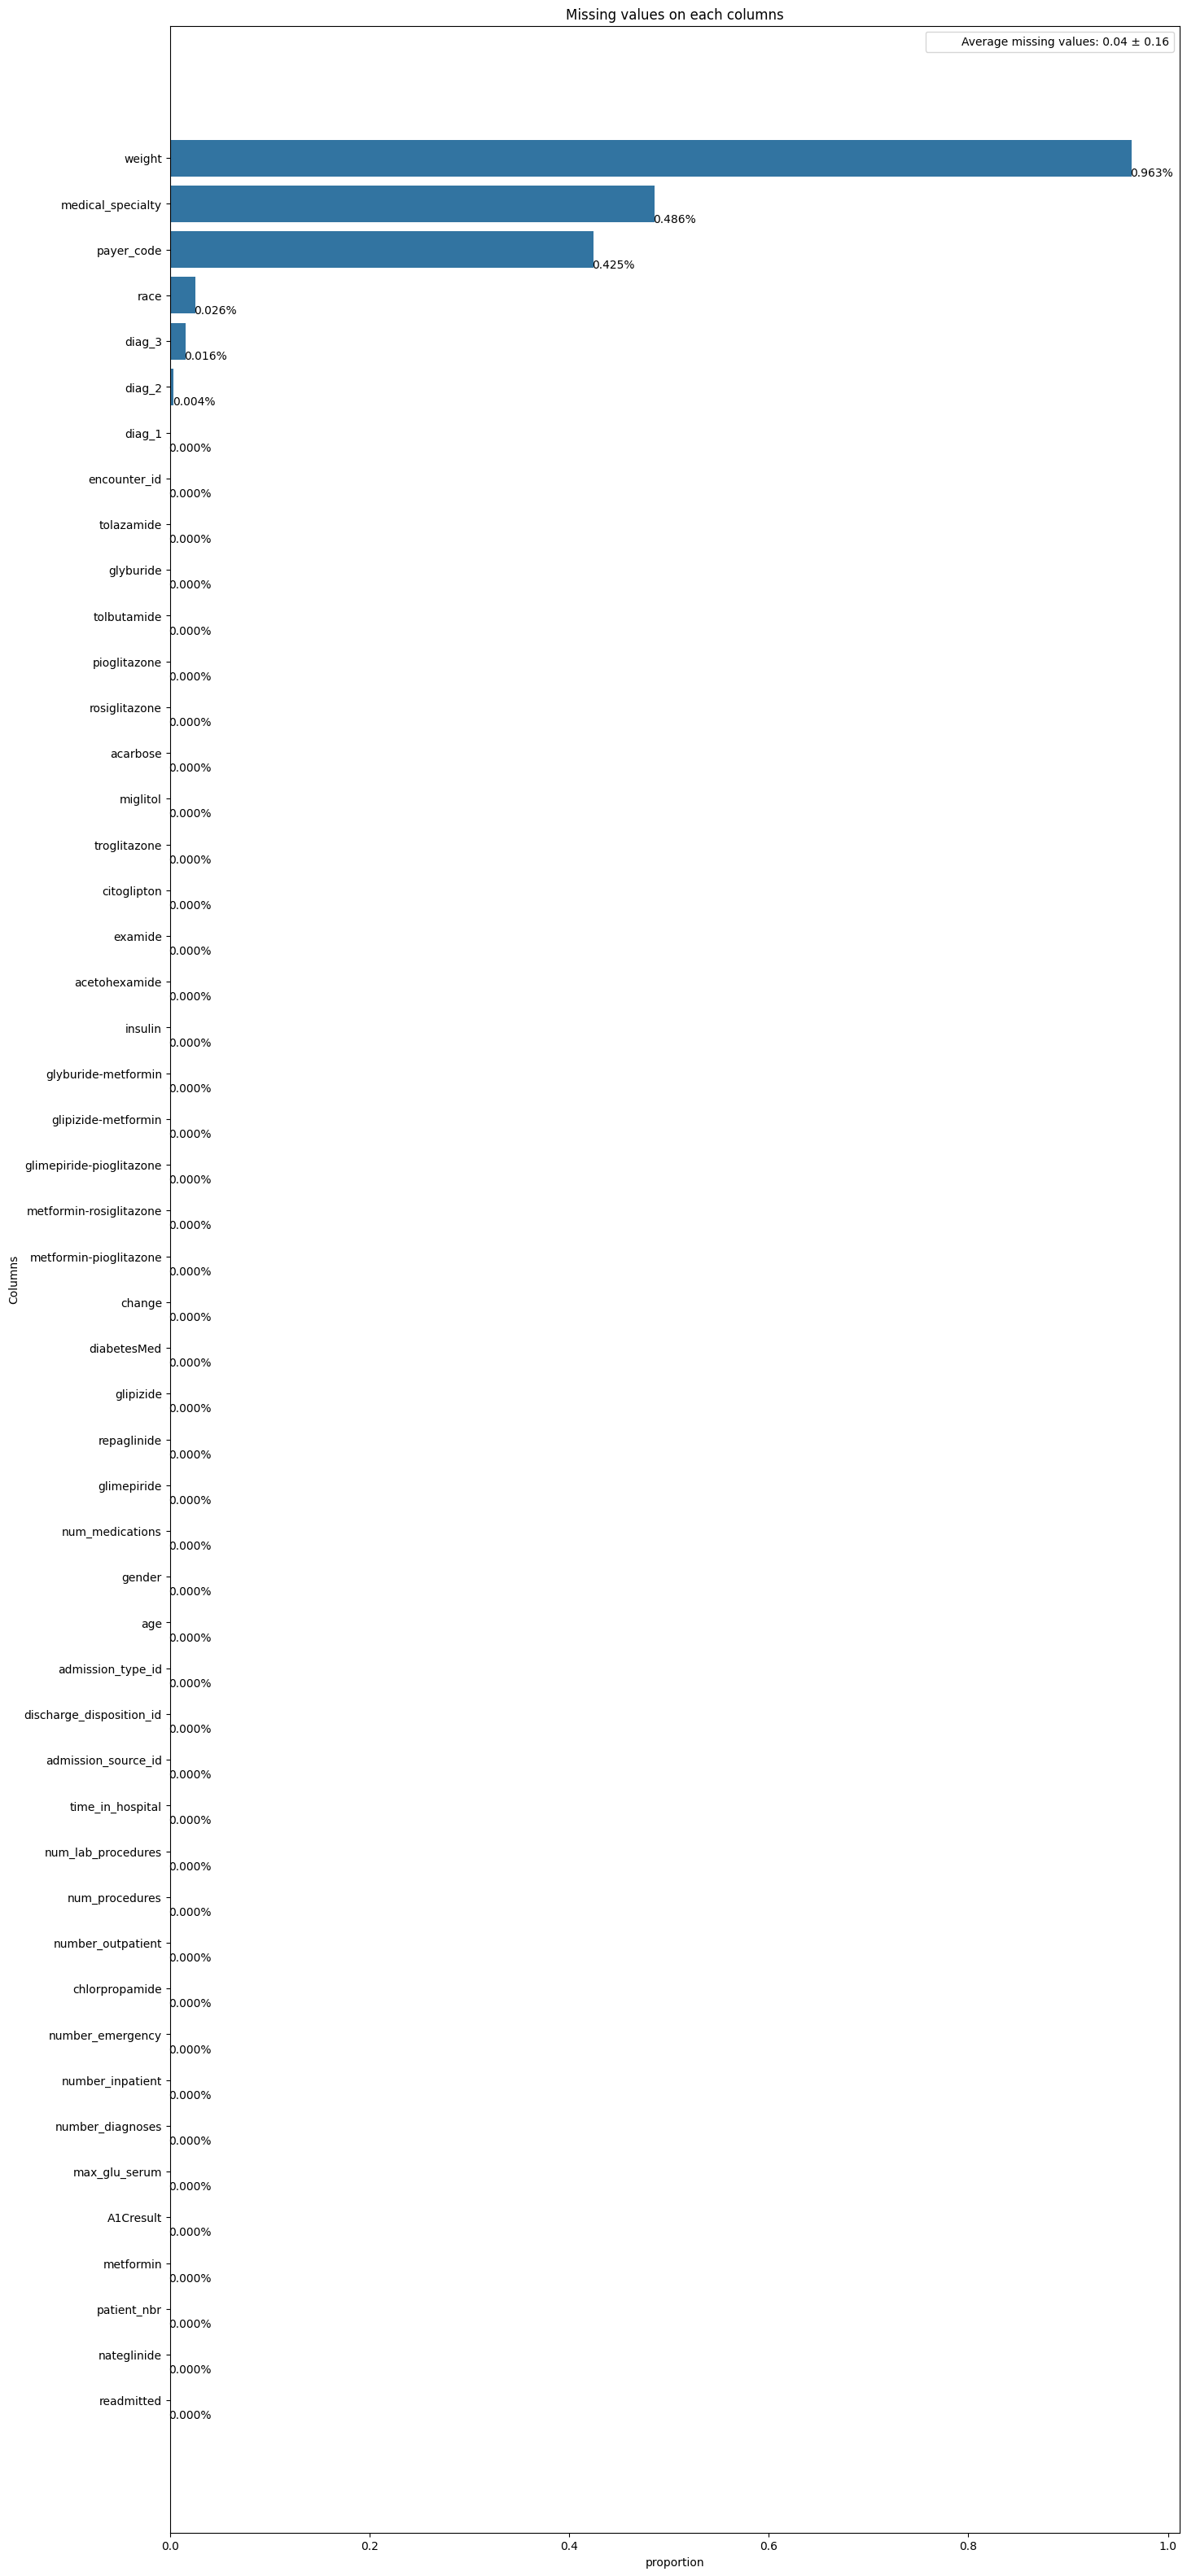

In [20]:
# plot missing values
missing, missing_list = plot_missing_values(diabetes)

- Most significant losses in values are columns `weight` (96%);

- Other notable columns are `payer_code` (42.5%); `medical_specialty` (48.6%); `race` (2.23%); `diag_1` to `diag_3`, ranging from 0.4% to 2.6%.

## Analysis numerical features

time_in_hospital
Skew : 1.15
Kurtosis : 0.89


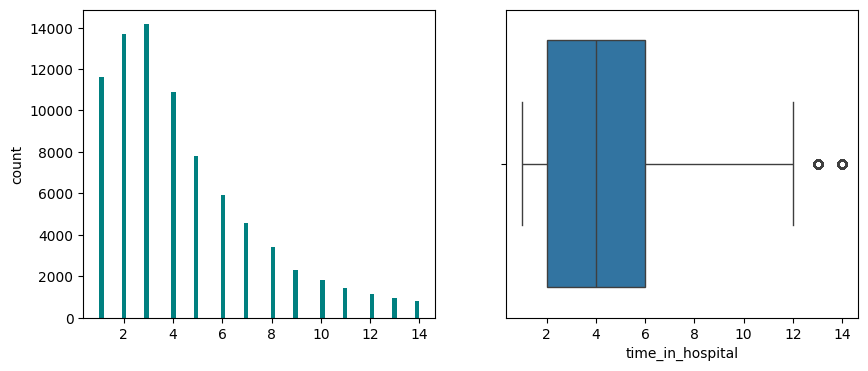

num_lab_procedures
Skew : -0.22
Kurtosis : -0.28


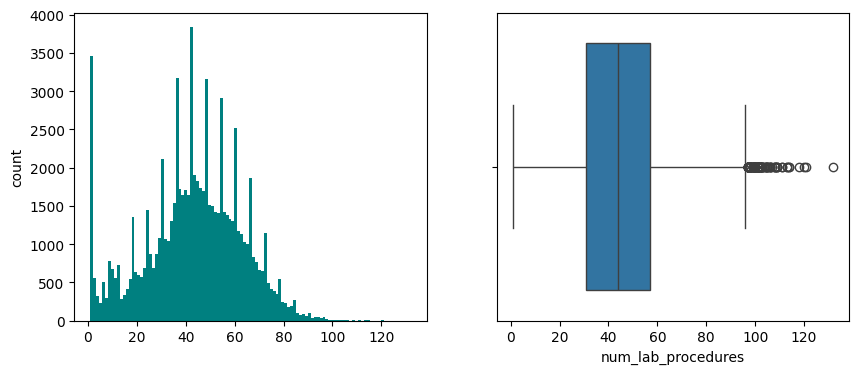

num_procedures
Skew : 1.26
Kurtosis : 0.67


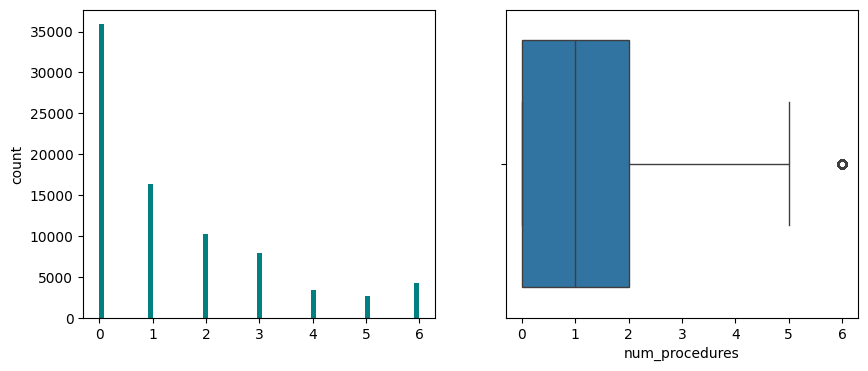

num_medications
Skew : 1.4
Kurtosis : 3.7


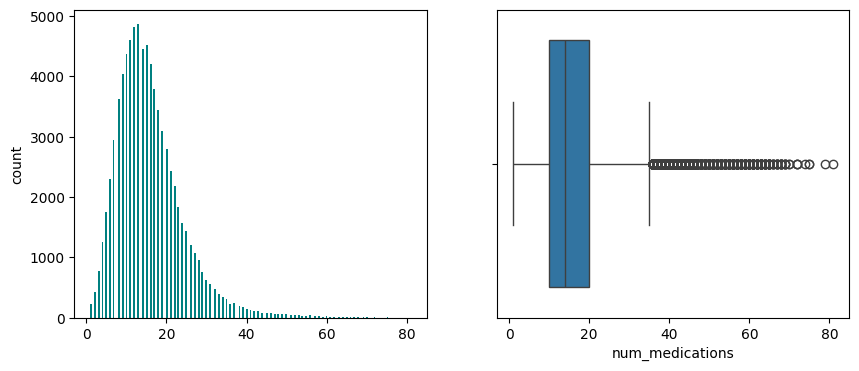

number_outpatient
Skew : 9.38
Kurtosis : 173.1


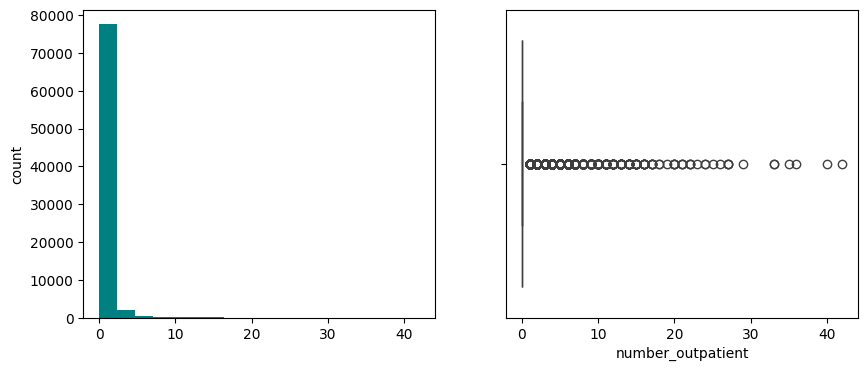

number_emergency
Skew : 22.64
Kurtosis : 1251.49


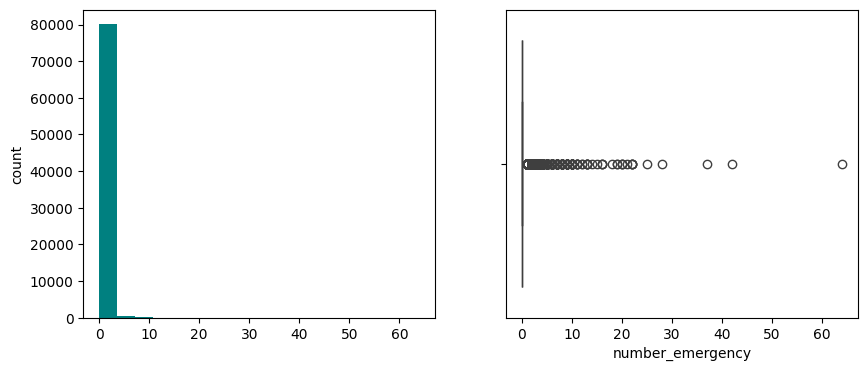

number_inpatient
Skew : 5.19
Kurtosis : 41.8


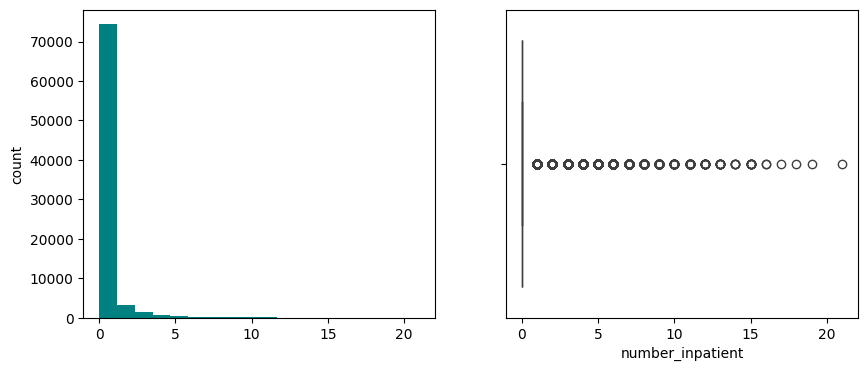

number_diagnoses
Skew : -0.79
Kurtosis : -0.26


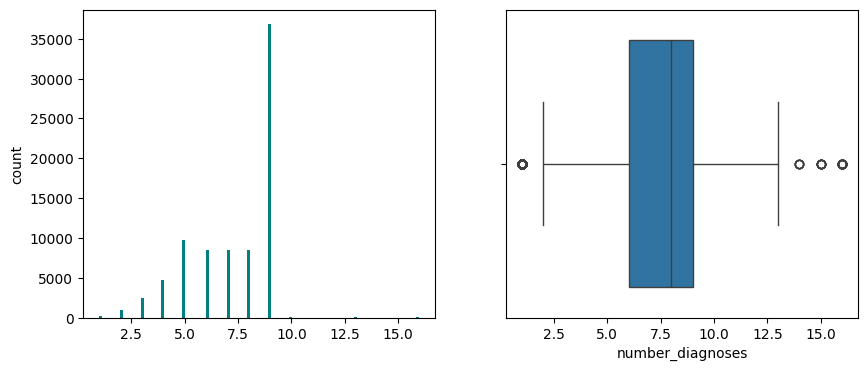

In [21]:
for col in [i for i in diabetes.select_dtypes(include='int64').columns
             if i not in('encounter_id','patient_nbr','admission_type_id',
                        'discharge_disposition_id','admission_source_id')]:
    print(col)
    print('Skew :', round(diabetes[col].skew(), 2))
    print('Kurtosis :', round(diabetes[col].kurtosis(), 2))
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(diabetes[col], bins='auto', color='teal')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=diabetes[col])
    plt.show()

- Most columns have highly skewed and asymmetric distributions except for `num_lab_procedures` which has an approximately symmetric distribution.

- Outliers are most significant in `num_medications`, `number_outpatient`, `number_emergency`, `number_inpatient`.
    - The distribution for `num_medications` states that most patients are given 10-20 different types of drugs for their treatment, while some requires more than 40 types of drugs.
    - Most patients were not hospitalized or in need of medications in the year preceding their encounter based on the graphs of `number_outpatient`, `number_emergency`, `number_inpatient`.


# Encode data

In [22]:
# Adjust diagnoses columns based on their ICD9 categories
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=249) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data
diabetes = map_diagnosis(diabetes, ['diag_1', 'diag_2', 'diag_3'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22048\1892611475.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Circulatory' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22048\1892611475.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Circulatory' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22048\1892611475.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Circulatory' has dt

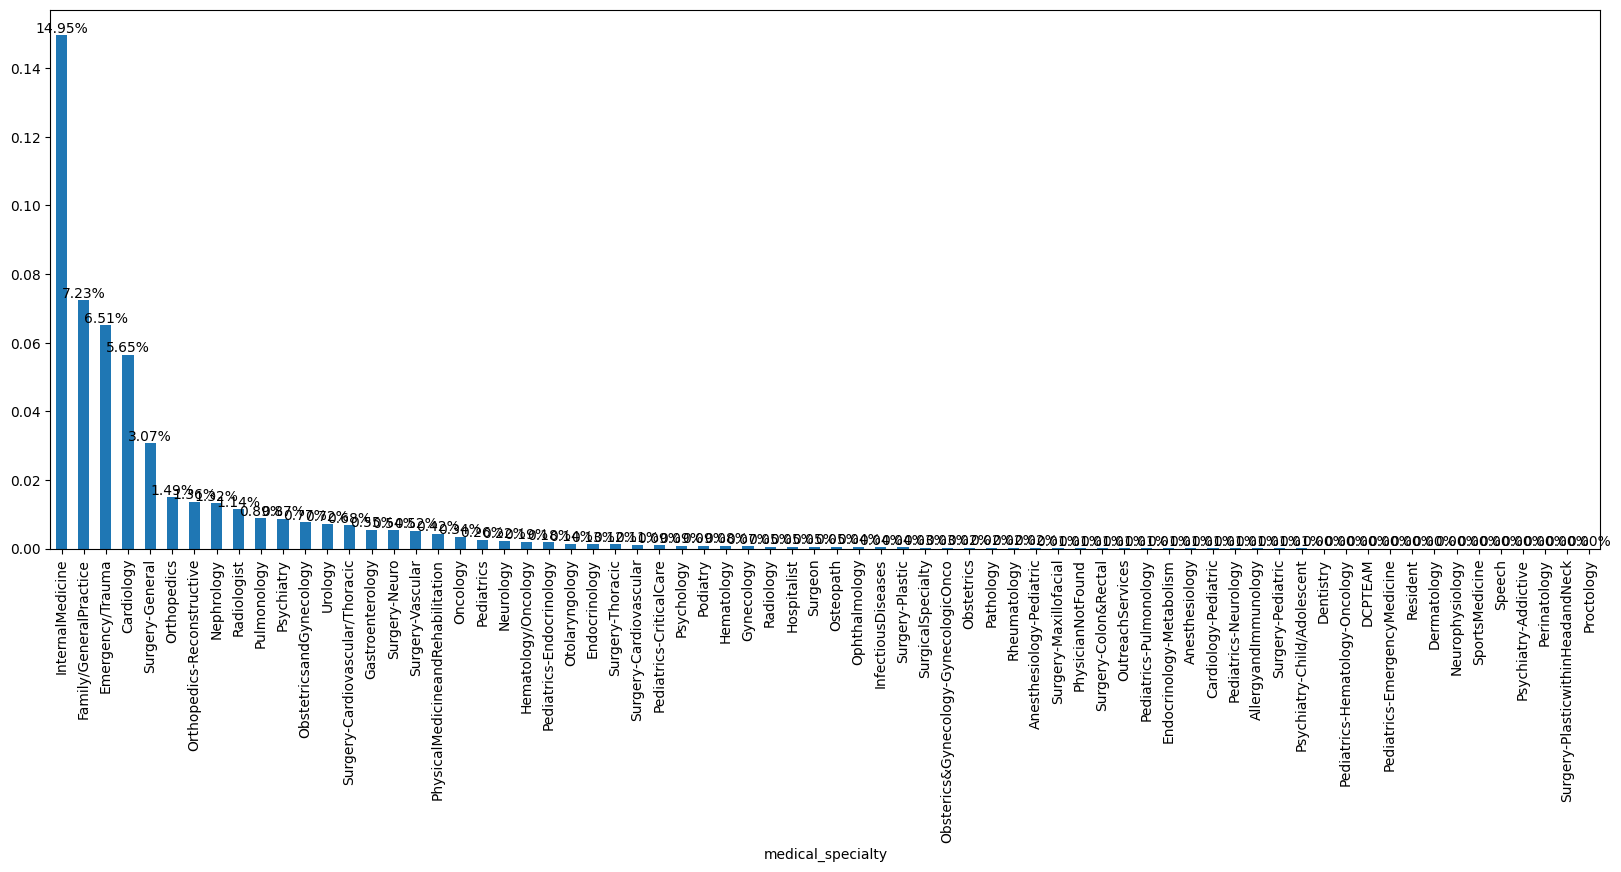

In [23]:
plt.figure(figsize=(20,7))
(diabetes['medical_specialty'].value_counts()/len(diabetes)).plot(kind='bar')
for i, value in enumerate(diabetes['medical_specialty'].value_counts() / len(diabetes)):
    plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')

In [24]:
proportion_med_sp = diabetes['medical_specialty'].value_counts()/len(diabetes)
# filter medical_specialty accounting for more than 0.003 proportion
filter_med_sp = [specialty for specialty in proportion_med_sp.index if proportion_med_sp[specialty] >= 0.003]

In [25]:
filter_med_sp

['InternalMedicine',
 'Family/GeneralPractice',
 'Emergency/Trauma',
 'Cardiology',
 'Surgery-General',
 'Orthopedics',
 'Orthopedics-Reconstructive',
 'Nephrology',
 'Radiologist',
 'Pulmonology',
 'Psychiatry',
 'ObstetricsandGynecology',
 'Urology',
 'Surgery-Cardiovascular/Thoracic',
 'Gastroenterology',
 'Surgery-Neuro',
 'Surgery-Vascular',
 'PhysicalMedicineandRehabilitation',
 'Oncology']

In [26]:
# Adjust medical_specialty column
def categorize_specialty(value):
    if value in filter_med_sp:
        return value
    else:
        return 'other'

diabetes['medical_specialty'] = diabetes['medical_specialty'].apply(categorize_specialty)

In [27]:
diabetes['medical_specialty'].value_counts()/len(diabetes)

medical_specialty
other                                0.509637
InternalMedicine                     0.149549
Family/GeneralPractice               0.072340
Emergency/Trauma                     0.065051
Cardiology                           0.056494
Surgery-General                      0.030725
Orthopedics                          0.014940
Orthopedics-Reconstructive           0.013611
Nephrology                           0.013226
Radiologist                          0.011425
Pulmonology                          0.008855
Psychiatry                           0.008731
ObstetricsandGynecology              0.007687
Urology                              0.007228
Surgery-Cardiovascular/Thoracic      0.006781
Gastroenterology                     0.005526
Surgery-Neuro                        0.005353
Surgery-Vascular                     0.005166
PhysicalMedicineandRehabilitation    0.004247
Oncology                             0.003428
Name: count, dtype: float64

In [28]:
# mapping readmitted values
readmitted_mapping = {
    '<30': 1,
    '>30': 0,
    'NO': 0
}

diabetes['readmitted'] = diabetes['readmitted'].map(readmitted_mapping)

In [29]:
# Adjust age column
young_grownup = ['[0-10)', '[10-20)', '[20-30)']
middle_age = ['[30-40)', '[40-50)', '[50-60)']

def categorize_age(value):
    if value in young_grownup:
        return '<30'
    elif value in middle_age:
        return '[30-60)'
    else:
        return '[60-100)'

diabetes['age'] = diabetes['age'].apply(categorize_age)

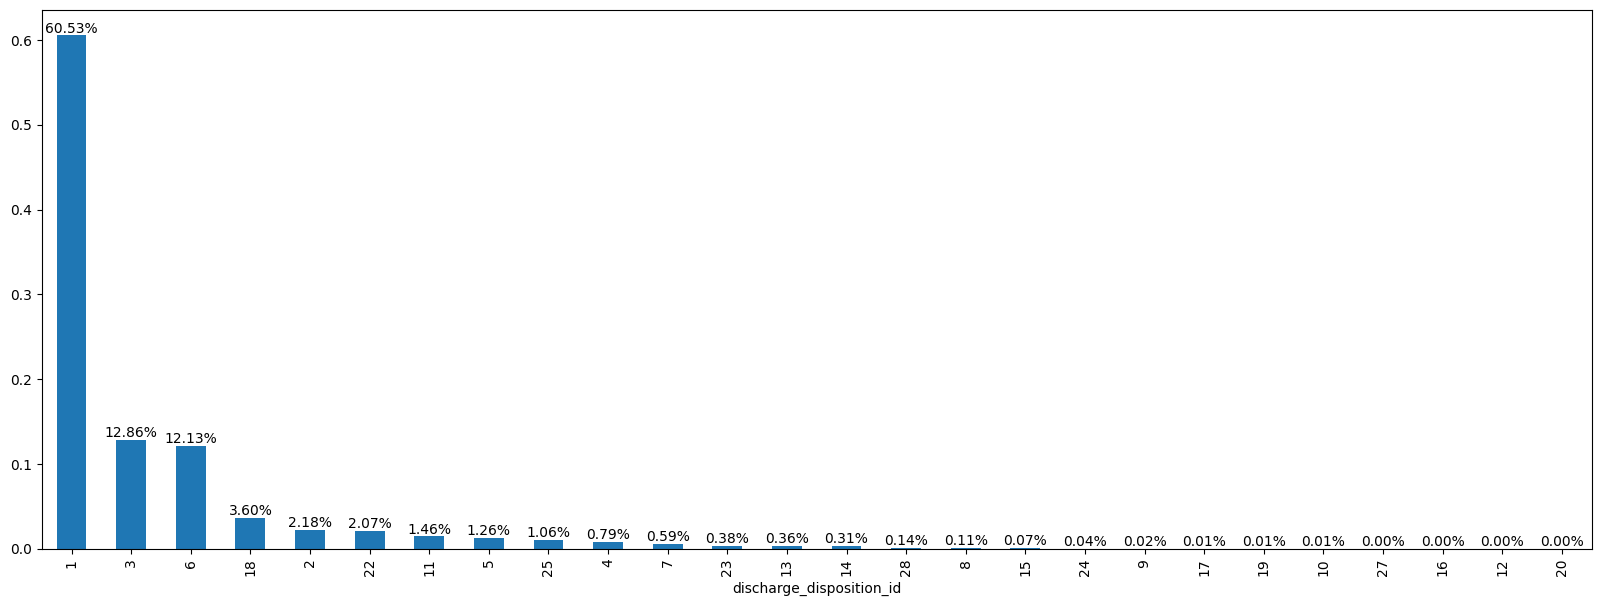

In [30]:
plt.figure(figsize=(20,7))
(diabetes['discharge_disposition_id'].value_counts()/len(diabetes)).plot(kind='bar')
for i, value in enumerate(diabetes['discharge_disposition_id'].value_counts() / len(diabetes)):
    plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')

- Based on the plot, we encode columns that have proportion more than 1%

In [31]:
proportion_discharge_disposition_id = diabetes['discharge_disposition_id'].value_counts()/len(diabetes)
filter_discharge_disposition_id = [id for id in proportion_discharge_disposition_id.index if proportion_discharge_disposition_id[id] >= 0.01]
filter_discharge_disposition_id

[1, 3, 6, 18, 2, 22, 11, 5, 25]

In [32]:
ádSDhrdjjs

NameError: name 'ádSDhrdjjs' is not defined

In [ ]:
# Adjust discharge_disposition_id column
def categorize_disposition(value):
    if value == 1:
        return 'Home'
    elif value == 3:
        return 'SNF'
    elif value == 6:
        return 'home with home health service'
    elif value == 18:
        return 'none'
    elif value == 2:
        return 'short term hospital'
    elif value == 22:
        return 'Home'
    elif value == 11:
        return 'expired'
    elif value == 5:
        return 'another institution'
    elif value == 25:
        return 'not mapped'
    else:
        return 'other'

diabetes['discharge_disposition_id'] = diabetes['discharge_disposition_id'].apply(categorize_disposition)

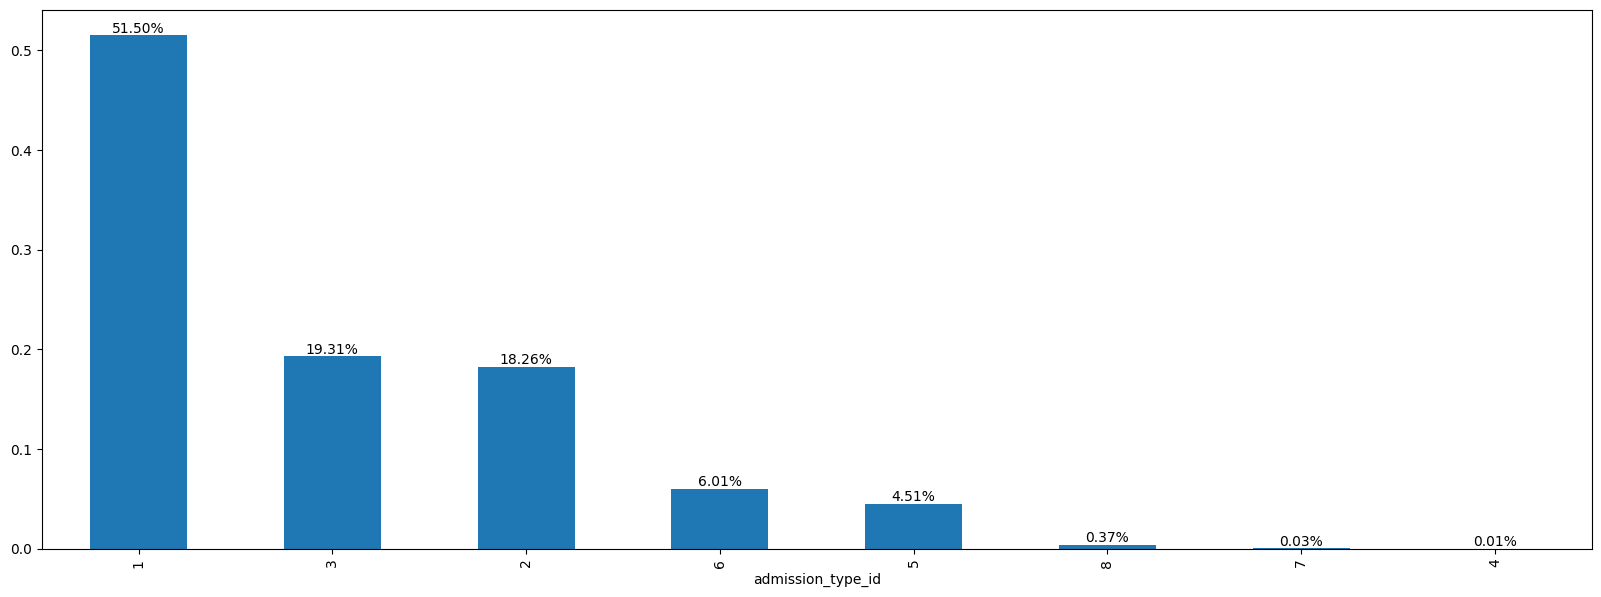

In [ ]:
plt.figure(figsize=(20,7))
(diabetes['admission_type_id'].value_counts()/len(diabetes)).plot(kind='bar')
for i, value in enumerate(diabetes['admission_type_id'].value_counts() / len(diabetes)):
    plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')

 - Based on the plot, we encode columns that have proportion more than 5%

In [ ]:
# Adjust admission_type_id column
def categorize_admission_type(value):
    if value == 1:
        return 'Emergency'
    elif value == 3:
        return 'Elective'
    elif value == 2:
        return 'Urgent'
    elif value == 6:
        return 'none'
    else:
        return 'other'

diabetes['admission_type_id'] = diabetes['admission_type_id'].apply(categorize_admission_type)

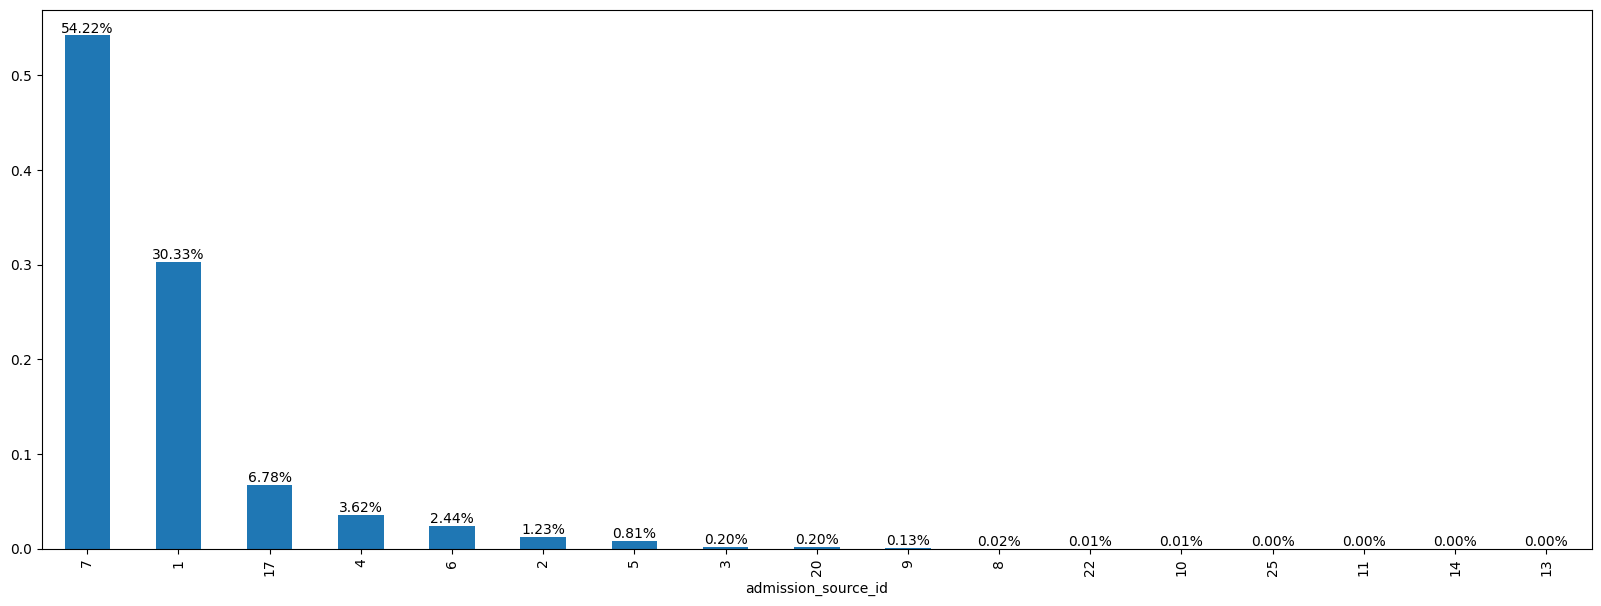

In [ ]:
plt.figure(figsize=(20,7))
(diabetes['admission_source_id'].value_counts()/len(diabetes)).plot(kind='bar')
for i, value in enumerate(diabetes['admission_source_id'].value_counts() / len(diabetes)):
    plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')

- Based on the plot, we encode columns that have proportion more than 3%

In [ ]:
# Adjust admission_source_id column
def categorize_admission_source(value):
    if value == 1:
        return ' Physician Referral'
    elif value == 7:
        return 'Emergency'
    elif value == 17:
        return 'none'
    elif value == 4:
        return 'a hospital'
    else:
        return 'other'

diabetes['admission_source_id'] = diabetes['admission_source_id'].apply(categorize_admission_source)

# Data reduction

In [ ]:
# remove not useful features
diabetes = diabetes.drop(columns=not_useful_features,axis = 1)

In [ ]:
# remove patient number and encounter id
diabetes = diabetes.drop(['encounter_id', 'patient_nbr'], axis=1)
# remove weight and payer code
diabetes = diabetes.drop(['weight', 'payer_code'], axis=1)

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80522 entries, 0 to 80521
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      78449 non-null  object
 1   gender                    80522 non-null  object
 2   age                       80522 non-null  object
 3   admission_type_id         80522 non-null  object
 4   discharge_disposition_id  80522 non-null  object
 5   admission_source_id       80522 non-null  object
 6   time_in_hospital          80522 non-null  int64 
 7   medical_specialty         80522 non-null  object
 8   num_lab_procedures        80522 non-null  int64 
 9   num_procedures            80522 non-null  int64 
 10  num_medications           80522 non-null  int64 
 11  number_outpatient         80522 non-null  int64 
 12  number_emergency          80522 non-null  int64 
 13  number_inpatient          80522 non-null  int64 
 14  diag_1                

# Handle missing value

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80522 entries, 0 to 80521
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      78449 non-null  object
 1   gender                    80522 non-null  object
 2   age                       80522 non-null  object
 3   admission_type_id         80522 non-null  object
 4   discharge_disposition_id  80522 non-null  object
 5   admission_source_id       80522 non-null  object
 6   time_in_hospital          80522 non-null  int64 
 7   medical_specialty         80522 non-null  object
 8   num_lab_procedures        80522 non-null  int64 
 9   num_procedures            80522 non-null  int64 
 10  num_medications           80522 non-null  int64 
 11  number_outpatient         80522 non-null  int64 
 12  number_emergency          80522 non-null  int64 
 13  number_inpatient          80522 non-null  int64 
 14  diag_1                

In [ ]:
cat_cols = diabetes.select_dtypes(include='object').columns
cat_cols

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed'],
      dtype='object')

In [ ]:
from missforest.missforest import MissForest

imputer = MissForest()
imputed_data = imputer.fit_transform(diabetes, categorical=cat_cols)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\missforest\missforest.py:227: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[c].fillna(initial_imputations[c], inplace=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 78449, number of used features: 29
[LightGBM] [Info] Start training from score -0.264893
[LightGBM] [Info] Start training from score -1.671138
[LightGBM] [Info] Start training from score -4.107807
[LightGBM] [Info] Start training from score -4.974938
[LightGBM] [Info] Start training from score -3.847830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 78449, number of used features: 29
[LightGBM] [Info] Start tr

In [ ]:
imputed_data.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male
age,[60-100),[60-100),[30-60),[60-100),[30-60)
admission_type_id,Emergency,Elective,Emergency,none,Emergency
discharge_disposition_id,other,Home,Home,Home,Home
admission_source_id,Emergency,Physician Referral,Emergency,none,Emergency
time_in_hospital,9,6,5,1,1
medical_specialty,Surgery-General,Urology,Nephrology,Family/GeneralPractice,other
num_lab_procedures,56,1,67,42,38
num_procedures,1,3,0,3,2


In [ ]:
# imputed_data.to_csv(r"D:\Code\Python\TH_Machine_Learning\diabetes_cleaned_by_T.csv",index=False)

In [ ]:
#### Comparison
original_race = diabetes['race']
imputed_race = imputed_data['race']
original_med_sp = diabetes['medical_specialty']
imputed_med_sp = imputed_data['medical_specialty']
display(original_race.value_counts(normalize=True), imputed_race.value_counts(True))
display(original_med_sp.value_counts(normalize=True), imputed_med_sp.value_counts(normalize=True))

race
Caucasian          0.767288
AfricanAmerican    0.188033
Hispanic           0.021326
Other              0.016444
Asian              0.006909
Name: proportion, dtype: float64

race
Caucasian          0.772211
AfricanAmerican    0.184248
Hispanic           0.020789
Other              0.016020
Asian              0.006731
Name: proportion, dtype: float64

medical_specialty
other                                0.509637
InternalMedicine                     0.149549
Family/GeneralPractice               0.072340
Emergency/Trauma                     0.065051
Cardiology                           0.056494
Surgery-General                      0.030725
Orthopedics                          0.014940
Orthopedics-Reconstructive           0.013611
Nephrology                           0.013226
Radiologist                          0.011425
Pulmonology                          0.008855
Psychiatry                           0.008731
ObstetricsandGynecology              0.007687
Urology                              0.007228
Surgery-Cardiovascular/Thoracic      0.006781
Gastroenterology                     0.005526
Surgery-Neuro                        0.005353
Surgery-Vascular                     0.005166
PhysicalMedicineandRehabilitation    0.004247
Oncology                             0.003428
Name: proportion, dtype: float64

medical_specialty
other                                0.509637
InternalMedicine                     0.149549
Family/GeneralPractice               0.072340
Emergency/Trauma                     0.065051
Cardiology                           0.056494
Surgery-General                      0.030725
Orthopedics                          0.014940
Orthopedics-Reconstructive           0.013611
Nephrology                           0.013226
Radiologist                          0.011425
Pulmonology                          0.008855
Psychiatry                           0.008731
ObstetricsandGynecology              0.007687
Urology                              0.007228
Surgery-Cardiovascular/Thoracic      0.006781
Gastroenterology                     0.005526
Surgery-Neuro                        0.005353
Surgery-Vascular                     0.005166
PhysicalMedicineandRehabilitation    0.004247
Oncology                             0.003428
Name: proportion, dtype: float64

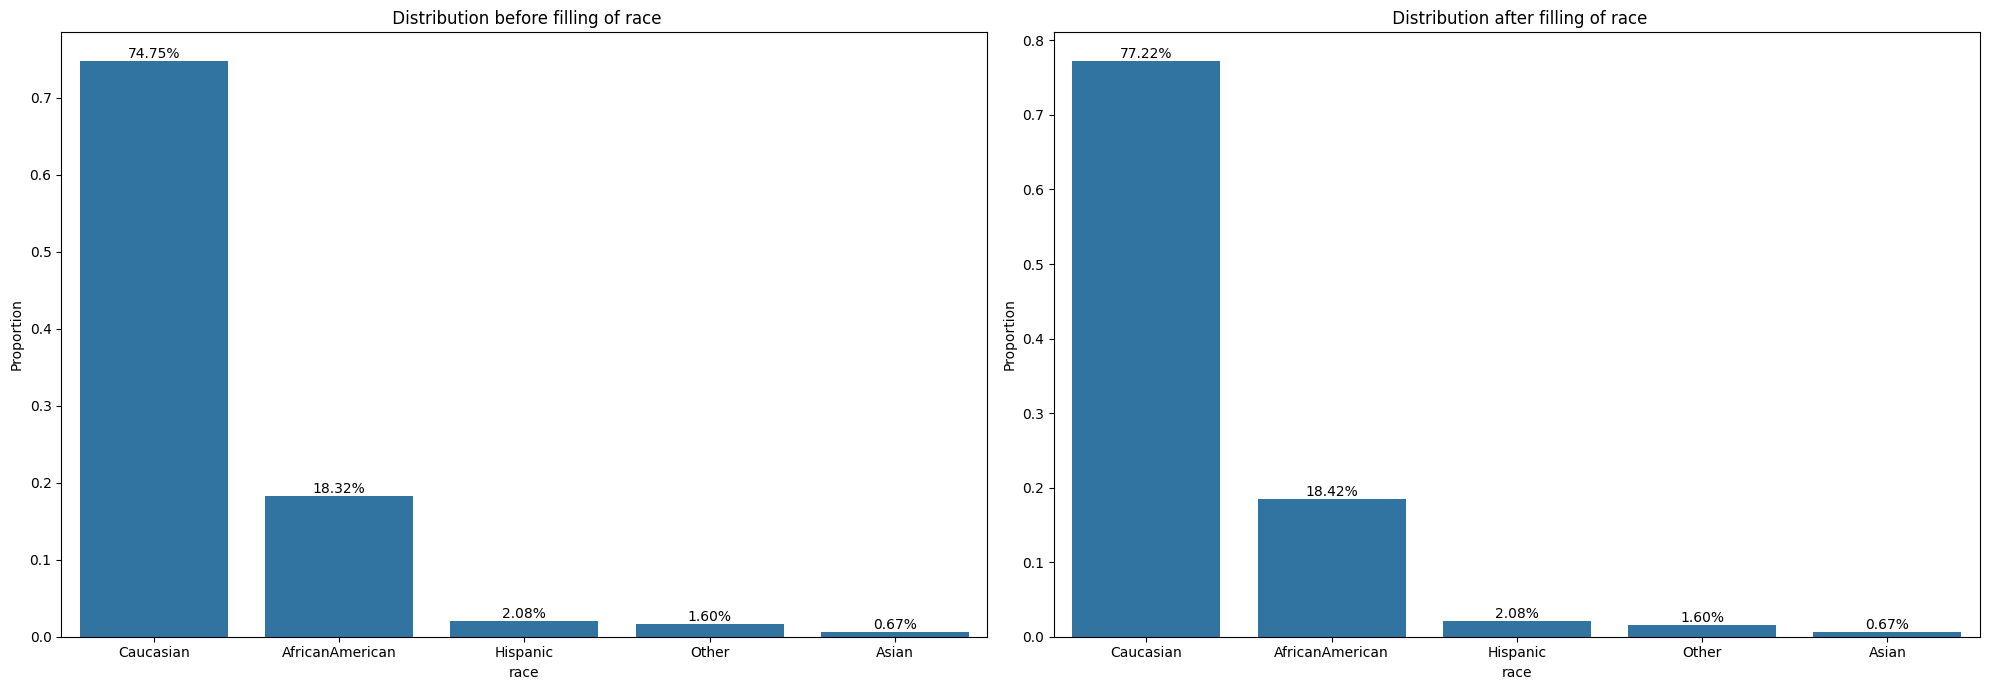

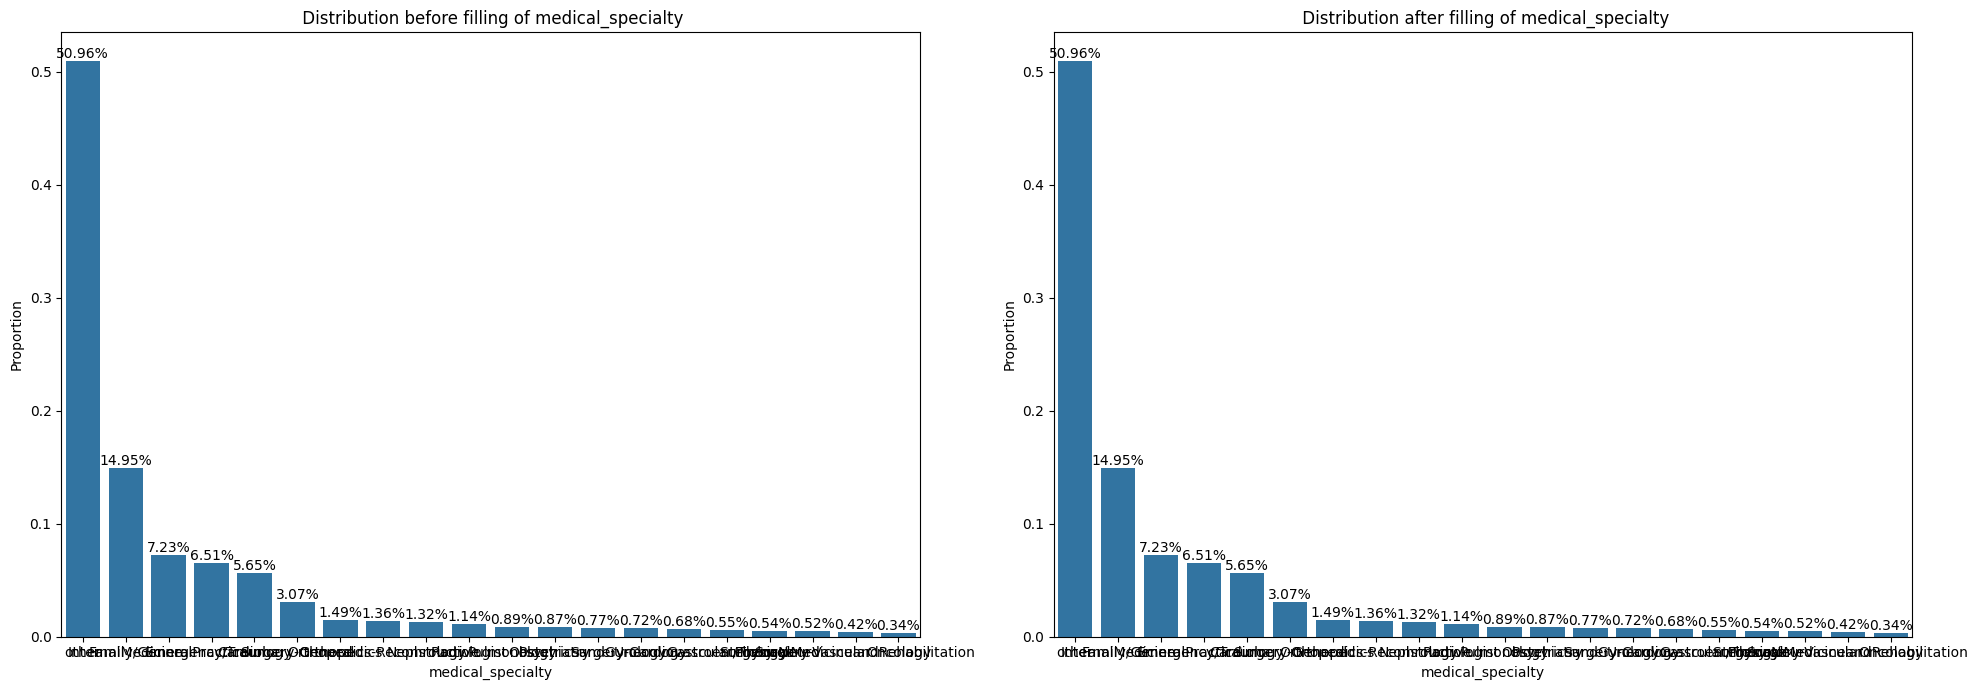

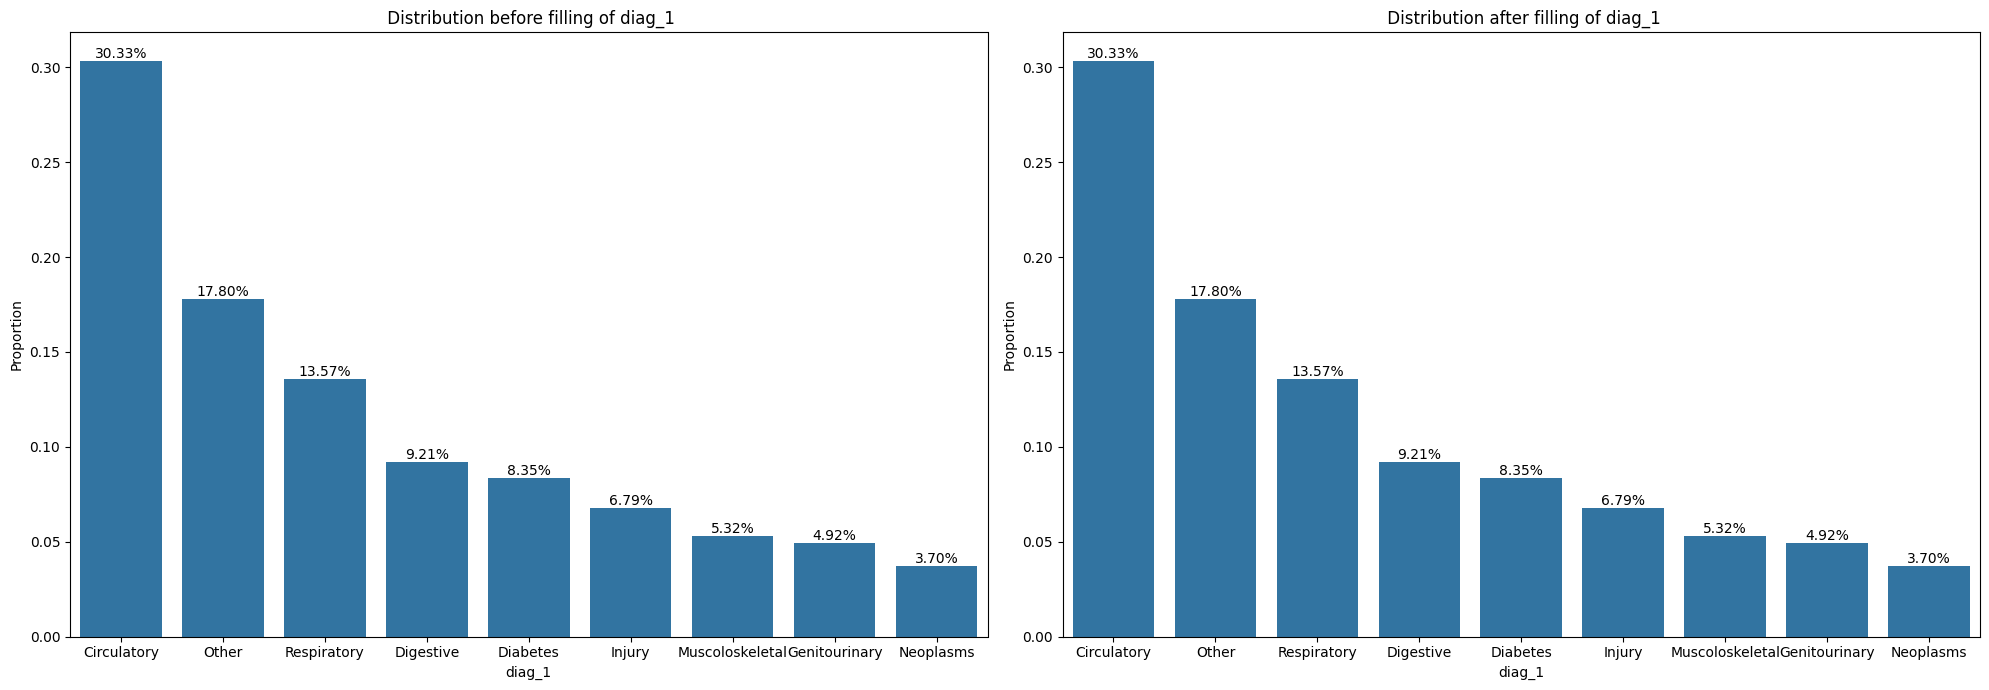

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot to understand the distribution of features for each label

for col in diabetes.columns:
    if col in ('medical_specialty','race','diag_1'):
        plt.figure(figsize=(20,7))
        data1 = diabetes[col].value_counts()/len(diabetes)
        df1 = data1.reset_index()
        df1.columns = ['Category', 'Proportion']
        plt.subplot(1, 2, 1)
        ax1 = sns.barplot(x='Category', y='Proportion', data=df1)
        plt.title(f' Distribution before filling of {col}')
        plt.xlabel(f'{col}')
        plt.ylabel('Proportion')

        for p in ax1.patches:
            height = p.get_height()
            ax1.text(p.get_x() + p.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom')

        data2 = imputed_data[col].value_counts()/len(imputed_data)
        df2 = data2.reset_index()
        df2.columns = ['Category', 'Proportion'] 
        plt.subplot(1, 2, 2)
        ax2 = sns.barplot(x='Category', y='Proportion', data=df2)
        plt.title(f' Distribution after filling of {col}')
        plt.xlabel(f'{col}')
        plt.ylabel('Proportion')

        for p in ax2.patches:
            height = p.get_height()
            ax2.text(p.get_x() + p.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()
